First we are considering Yellow Taxi data for febraury


# Data Importing and Data Summarisation

In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_tripdata_2020-02.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,0,1,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,1.0,N,145,7,1,11.0,0.5,0.5,2.45,0.0,0.3,14.75,0.0,NaN
1,1,1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,1.0,N,45,61,1,21.5,3.0,0.5,6.30,0.0,0.3,31.60,2.5,NaN
2,2,1,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,1.0,N,186,140,1,11.0,3.0,0.5,1.00,0.0,0.3,15.80,2.5,NaN
3,3,2,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,1.0,N,144,140,1,18.0,0.5,0.5,3.00,0.0,0.3,24.80,2.5,NaN
4,4,2,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,1.0,N,238,152,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,0.0,NaN


In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
dtypes: float64(12), int64(5), object(3)
memory usage: 961.2+ MB


In [ ]:
trip_data.shape

(6299367, 20)

# Data Cleaning and Manipulation Steps


In [ ]:
trip_data.drop(['Unnamed: 0','VendorID','RatecodeID','store_and_fwd_flag','airport_fee','congestion_surcharge'],inplace = True,axis =1)

In [ ]:
trip_data['tpep_pickup_datetime'] = pd.to_datetime(trip_data['tpep_pickup_datetime'])
trip_data['tpep_dropoff_datetime'] = pd.to_datetime(trip_data['tpep_dropoff_datetime'])

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6299367 entries, 0 to 6299366
Data columns (total 14 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
dtypes: datetime64[ns](2), float64(9), int64(3)
memory usage: 672.8 MB


In [ ]:
trip_data = trip_data.dropna()

In [ ]:
# create 'duration' column using pd.Timedelta(minutes=1)
trip_data['duration'] = (trip_data['tpep_dropoff_datetime'] - trip_data['tpep_pickup_datetime'])/ pd.Timedelta(minutes=1)
# create 'trip_pickup_hour' column using 'tpep_pickup_datetime' column
trip_data['trip_pickup_hour'] = trip_data['tpep_pickup_datetime'].dt.hour
# create 'trip_dropoff_hour' column using 'tpep_dropoff_datetime' column
trip_data['trip_dropoff_hour'] = trip_data['tpep_dropoff_datetime'].dt.hour
# create 'trip_day' column using 'tpep_pickup_datetime' column - use day_name()
trip_data['trip_day'] = trip_data['tpep_pickup_datetime'].dt.day_name()
# print data info
print(trip_data.info())
# print data head
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6250533 entries, 0 to 6250532
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        float64       
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           int64         
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  duration               float64       
 15  trip_pickup_hour       int64         
 16  trip_dropoff_hour      int64         
 17  trip_day               object        
dtypes: datetime64[ns](2), 

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1.0,2.60,145,7,1,11.0,0.5,0.5,2.45,0.0,0.3,14.75,12.950000,0,0,Saturday
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1.0,4.80,45,61,1,21.5,3.0,0.5,6.30,0.0,0.3,31.60,32.816667,0,1,Saturday
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1.0,3.20,186,140,1,11.0,3.0,0.5,1.00,0.0,0.3,15.80,11.733333,0,0,Saturday
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1.0,4.38,144,140,1,18.0,0.5,0.5,3.00,0.0,0.3,24.80,24.066667,0,0,Saturday
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1.0,2.28,238,152,2,9.5,0.5,0.5,0.00,0.0,0.3,10.80,9.766667,0,1,Saturday


Now our Total_amount is basically
Total_amount = fare_amount + tolls_amount + tip_amount + (extra + mta_tax + improvement_surcharge)

of the above components of total_amount we will specifically focus on 'fare_amount','tip_amount', 'tolls_amount' and 'total taxes'.

In [ ]:
trip_data['total_tax'] = trip_data['extra'] + trip_data['mta_tax'] + trip_data['improvement_surcharge'] 

In [ ]:
trip_data.drop(['extra','mta_tax','improvement_surcharge'],inplace = True,axis = 1)

In [ ]:
trip_data['passenger_count']=trip_data['passenger_count'].astype(int)

In [ ]:
trip_data

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,1,11.0,2.45,0.0,14.75,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,1,21.5,6.30,0.0,31.60,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,1,11.0,1.00,0.0,15.80,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,1,18.0,3.00,0.0,24.80,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,2,9.5,0.00,0.0,10.80,9.766667,0,1,Saturday,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6250528,2020-02-29 23:08:41,2020-02-29 23:13:24,1,0.54,50,48,2,5.0,0.00,0.0,8.80,4.716667,23,23,Saturday,1.3
6250529,2020-02-29 23:30:49,2020-02-29 23:50:29,1,2.91,113,229,2,14.0,0.00,0.0,17.80,19.666667,23,23,Saturday,1.3
6250530,2020-02-29 23:22:08,2020-02-29 23:31:02,1,1.65,262,237,1,8.5,1.70,0.0,14.00,8.900000,23,23,Saturday,1.3
6250531,2020-02-29 23:47:04,2020-02-29 23:51:32,2,0.72,140,236,1,5.0,2.64,0.0,11.44,4.466667,23,23,Saturday,1.3


For payment_type we have the following mapping for categories:
1= Credit card 2= Cash 3= No charge 4= Dispute 5= Unknown 6= Voided trip

let's just check if we have only these categories available in payment_type or not

In [ ]:
# value_counts for 'payment_type' column
trip_data['payment_type'].value_counts()

1    4705735
2    1494468
3      32081
4      18249
Name: payment_type, dtype: int64

In [ ]:
def map_payment_type(x):
    if x==1:
        return 'Credit_card'
    elif x==2:
        return 'Cash'
    elif x==3:
        return 'No_charge'
    elif x==4:
        return 'Dispute'
    elif x==5:
        return 'Unknown'
    else:
        return 'Voided_trip'

# use .apply and lambda on payment_type column to change 'payment_type' column
trip_data['payment_type'] = trip_data.payment_type.apply(lambda x:map_payment_type(x))
# print data head
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,Cash,9.5,0.00,0.0,10.80,9.766667,0,1,Saturday,1.3


In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv',index=False)

We will be reading back this file in data analysis and visualisation step.

#Data Analysis and Visualisation

In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3



CONTINUOUS VARIABLE DISTRIBUTION(Univariate Analysis)

In [ ]:
# continuous_columns list
continuous_columns = ['fare_amount','tip_amount','total_tax','total_amount','duration','trip_distance','tolls_amount']

In [ ]:
trip_data[continuous_columns].head()

,fare_amount,tip_amount,total_tax,total_amount,duration,trip_distance,tolls_amount
0,11.0,2.45,1.3,14.75,12.950000,2.60,0.0
1,21.5,6.30,3.8,31.60,32.816667,4.80,0.0
2,11.0,1.00,3.8,15.80,11.733333,3.20,0.0
3,18.0,3.00,1.3,24.80,24.066667,4.38,0.0
4,9.5,0.00,1.3,10.80,9.766667,2.28,0.0


In [ ]:
# use .describe() for showing the statistics for continuous columns
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_tax,total_amount,duration,trip_distance,tolls_amount
count,6.250533e+06,6.250533e+06,6.250533e+06,6.250533e+06,6.250533e+06,6.250533e+06,6.250533e+06
mean,1.245649e+01,2.237489e+00,1.887136e+00,1.844633e+01,1.602990e+01,2.789204e+00,3.170078e-01
std,1.175894e+01,2.667471e+00,1.261442e+00,1.435989e+01,6.168317e+01,3.640196e+00,1.658398e+00
min,-7.500000e+02,-9.300000e+01,-5.300000e+00,-7.503000e+02,-9.990667e+03,0.000000e+00,-3.823000e+01
25%,6.500000e+00,0.000000e+00,8.000000e-01,1.127000e+01,6.516667e+00,9.500000e-01,0.000000e+00
50%,9.000000e+00,1.960000e+00,1.300000e+00,1.430000e+01,1.075000e+01,1.600000e+00,0.000000e+00
75%,1.400000e+01,2.950000e+00,3.300000e+00,1.980000e+01,1.716667e+01,2.860000e+00,0.000000e+00
max,6.052000e+03,5.490200e+02,9.086000e+01,6.061420e+03,3.147617e+03,3.699400e+02,9.255000e+02


Since we are trying to understand the distribution of continuous numerical variables, we will be using

histograms
box plots
Below we have used a for loop to loop through all the continuous variables and then draw histograms and box plots for each of them at each iteration

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


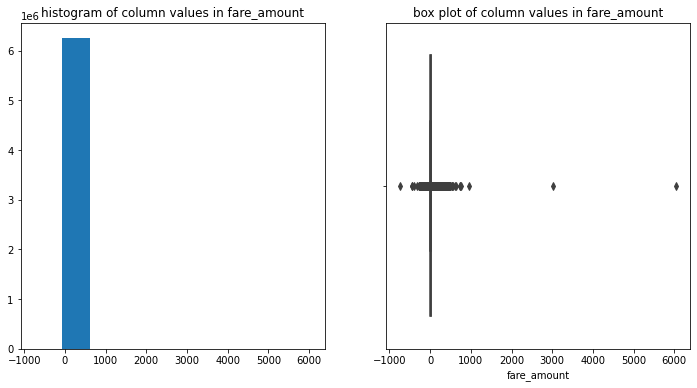

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


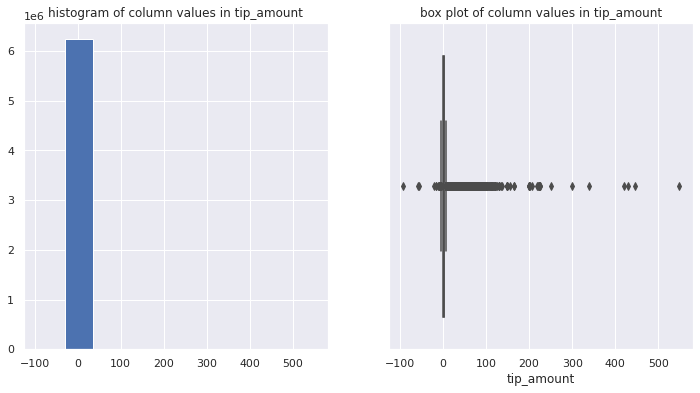

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


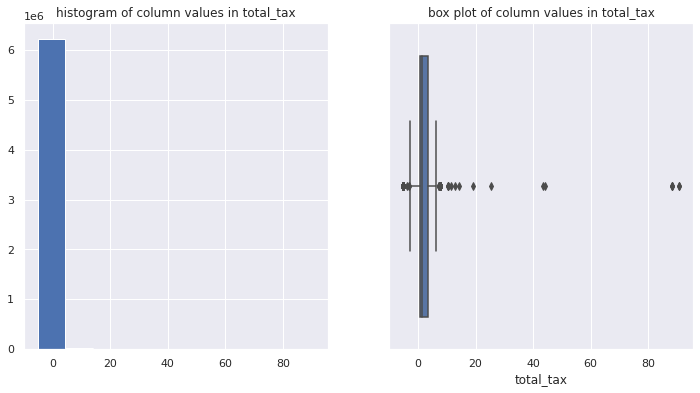

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


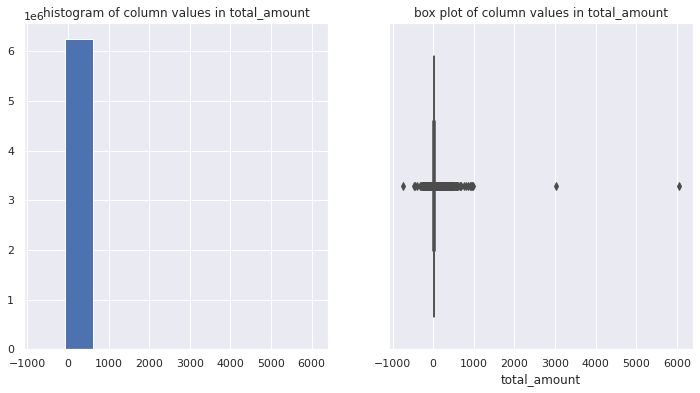

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


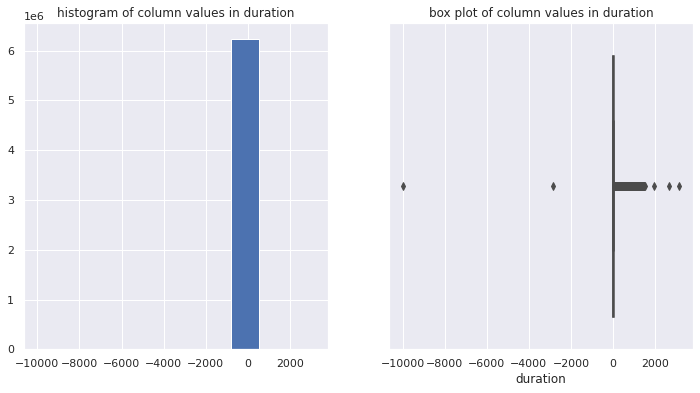

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


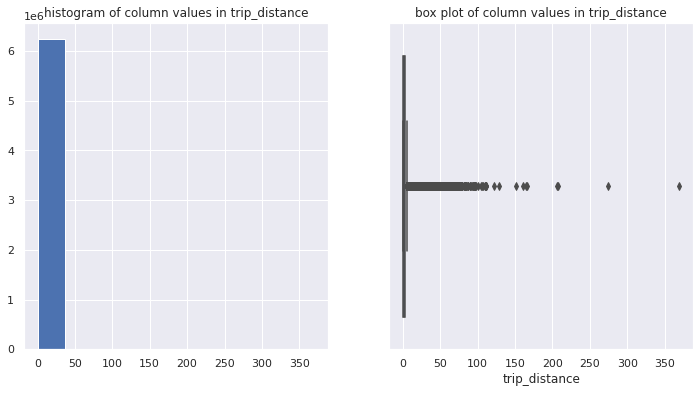

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


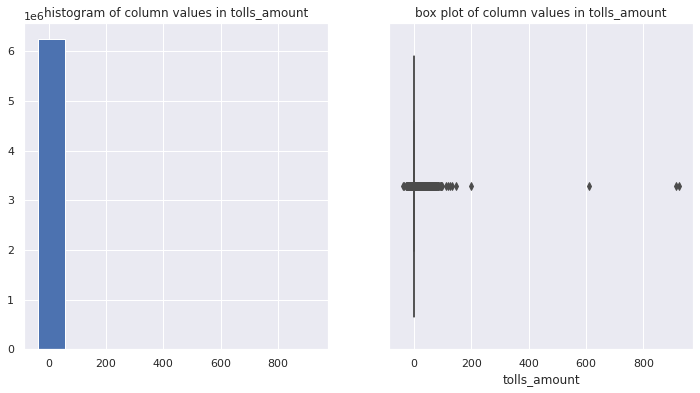

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Negtive values for columns does not make sense
fare_amount
tip_amount
total_taxes
tolls_amount
total_amount
duration

Let's just observe how the negative values in each of these columns look like

In [ ]:
trip_data.loc[trip_data['fare_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249602,2020-02-29 23:42:01,2020-02-29 23:48:28,1,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,6.450000,23,23,Saturday,-1.3
6250088,2020-02-29 23:58:03,2020-03-01 00:10:03,1,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,12.000000,23,0,Saturday,-1.3
6250319,2020-02-29 23:57:34,2020-02-29 23:59:33,1,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,1.983333,23,23,Saturday,-1.3
6250353,2020-02-29 23:32:22,2020-02-29 23:47:16,1,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,14.900000,23,23,Saturday,-1.3


In [ ]:
trip_data.loc[trip_data['tip_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
90145,2020-02-01 13:53:14,2020-02-01 13:53:31,1,0.00,233,233,No_charge,-2.5,-1.16,0.0,-8.91,0.283333,13,13,Saturday,-0.8
265262,2020-02-02 10:53:13,2020-02-02 10:53:28,1,0.00,193,193,No_charge,-2.5,-0.66,0.0,-3.96,0.250000,10,10,Sunday,-0.8
271885,2020-02-02 11:23:46,2020-02-02 11:28:10,1,0.86,246,90,No_charge,-5.5,-1.00,0.0,-9.80,4.400000,11,11,Sunday,-0.8
272648,2020-02-02 11:36:17,2020-02-02 11:38:03,1,0.00,193,193,No_charge,-3.0,-0.76,0.0,-4.56,1.766667,11,11,Sunday,-0.8
336218,2020-02-02 17:49:48,2020-02-02 17:50:28,1,0.00,193,193,No_charge,-2.5,-0.66,0.0,-3.96,0.666667,17,17,Sunday,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6005279,2020-02-28 22:24:06,2020-02-28 22:24:14,1,0.00,7,7,No_charge,-2.5,-1.14,0.0,-4.94,0.133333,22,22,Friday,-1.3
6034008,2020-02-29 01:39:31,2020-02-29 01:40:36,4,0.20,236,237,Dispute,-3.0,-1.50,0.0,-8.30,1.083333,1,1,Saturday,-1.3
6043967,2020-02-29 02:07:11,2020-02-29 02:07:14,1,0.00,13,264,Dispute,-31.0,-7.95,0.0,-39.75,0.050000,2,2,Saturday,-0.8
6046852,2020-02-29 02:06:26,2020-02-29 02:06:35,4,0.00,211,211,Dispute,-30.0,-6.56,0.0,-39.36,0.150000,2,2,Saturday,-0.3


In [ ]:
trip_data.loc[trip_data['tolls_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
1981,2020-02-01 00:54:26,2020-02-01 01:07:28,1,5.43,74,138,Dispute,-17.5,0.0,-6.12,-24.92,13.033333,0,1,Saturday,-1.3
24629,2020-02-01 03:27:35,2020-02-01 03:28:43,1,0.00,265,265,Dispute,-45.0,0.0,-11.75,-57.05,1.133333,3,3,Saturday,-0.3
26688,2020-02-01 03:38:15,2020-02-01 03:55:41,1,7.57,107,82,Dispute,-23.5,0.0,-6.12,-33.42,17.433333,3,3,Saturday,-1.3
30057,2020-02-01 04:14:57,2020-02-01 04:33:59,1,10.08,237,138,Cash,-29.0,0.0,-6.12,-38.92,19.033333,4,4,Saturday,-1.3
33505,2020-02-01 06:24:00,2020-02-01 06:50:57,1,20.62,132,119,Cash,-54.5,0.0,-6.12,-61.42,26.950000,6,6,Saturday,-0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6175398,2020-02-29 18:49:16,2020-02-29 19:17:31,2,9.86,186,138,Dispute,-32.0,0.0,-6.12,-41.42,28.250000,18,19,Saturday,-0.8
6176162,2020-02-29 18:32:16,2020-02-29 18:49:31,2,6.16,13,133,Cash,-20.0,0.0,-6.12,-29.42,17.250000,18,18,Saturday,-0.8
6187979,2020-02-29 19:46:34,2020-02-29 19:46:43,2,0.00,230,230,Dispute,-52.0,1.5,-6.12,-59.92,0.150000,19,19,Saturday,-0.8
6226805,2020-02-29 22:33:48,2020-02-29 22:53:11,1,6.13,161,80,Dispute,-20.5,0.0,-6.12,-30.42,19.383333,22,22,Saturday,-1.3


In [ ]:
trip_data.loc[trip_data['total_tax']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249602,2020-02-29 23:42:01,2020-02-29 23:48:28,1,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,6.450000,23,23,Saturday,-1.3
6250088,2020-02-29 23:58:03,2020-03-01 00:10:03,1,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,12.000000,23,0,Saturday,-1.3
6250319,2020-02-29 23:57:34,2020-02-29 23:59:33,1,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,1.983333,23,23,Saturday,-1.3
6250353,2020-02-29 23:32:22,2020-02-29 23:47:16,1,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,14.900000,23,23,Saturday,-1.3


In [ ]:
trip_data.loc[trip_data['total_amount']<0]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
93,2020-02-01 00:40:09,2020-02-01 00:40:56,5,0.02,100,100,No_charge,-2.5,0.0,0.0,-6.3,0.783333,0,0,Saturday,-1.3
229,2020-02-01 00:21:29,2020-02-01 00:23:17,1,0.03,244,244,Dispute,-3.0,0.0,0.0,-4.3,1.800000,0,0,Saturday,-1.3
411,2020-02-01 00:36:53,2020-02-01 00:40:24,1,0.00,230,230,No_charge,-4.0,0.0,0.0,-7.8,3.516667,0,0,Saturday,-1.3
725,2020-02-01 00:04:51,2020-02-01 00:06:36,1,0.12,230,230,Cash,-3.0,0.0,0.0,-6.8,1.750000,0,0,Saturday,-1.3
907,2020-02-01 00:59:01,2020-02-01 01:22:38,1,6.53,48,129,Dispute,-22.5,0.0,0.0,-26.3,23.616667,0,1,Saturday,-1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6249602,2020-02-29 23:42:01,2020-02-29 23:48:28,1,1.36,142,162,Cash,-6.5,0.0,0.0,-10.3,6.450000,23,23,Saturday,-1.3
6250088,2020-02-29 23:58:03,2020-03-01 00:10:03,1,1.84,249,4,No_charge,-9.5,0.0,0.0,-13.3,12.000000,23,0,Saturday,-1.3
6250319,2020-02-29 23:57:34,2020-02-29 23:59:33,1,0.25,140,141,Dispute,-3.5,0.0,0.0,-7.3,1.983333,23,23,Saturday,-1.3
6250353,2020-02-29 23:32:22,2020-02-29 23:47:16,1,2.38,79,230,No_charge,-11.0,0.0,0.0,-14.8,14.900000,23,23,Saturday,-1.3


In [ ]:
trip_data = trip_data.loc[trip_data['fare_amount']>=0]
trip_data = trip_data.loc[trip_data['tip_amount']>=0]
trip_data = trip_data.loc[trip_data['tolls_amount']>=0]
trip_data = trip_data.loc[trip_data['total_tax']>=0]
trip_data = trip_data.loc[trip_data['total_amount']>=0]
trip_data = trip_data.loc[trip_data['duration']>=0]

In [ ]:
trip_data.shape

(6230547, 16)

Now we will again look at the distribution plots for these variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


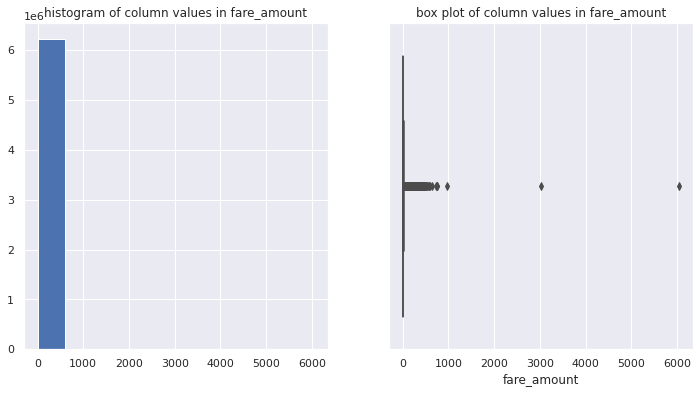

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


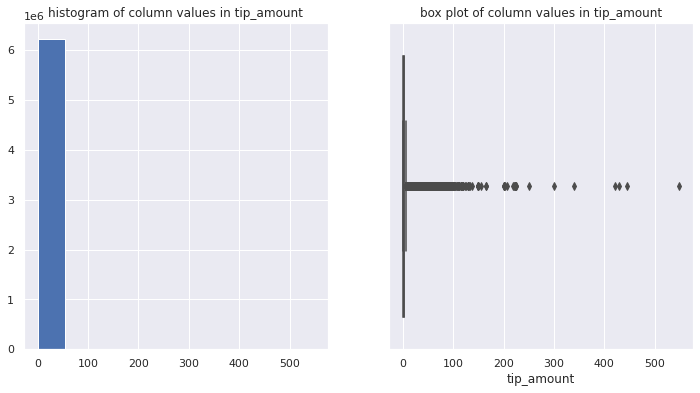

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


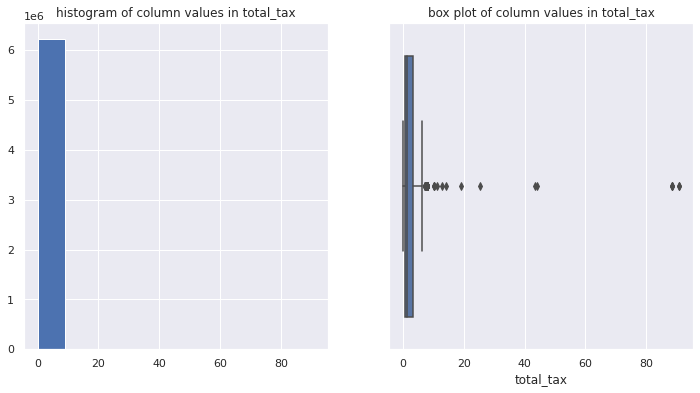

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


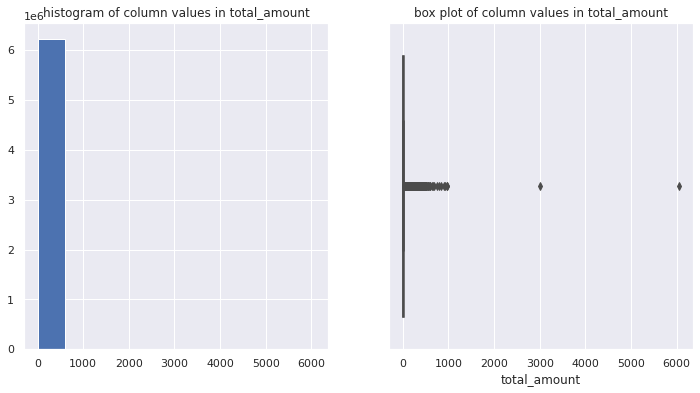

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


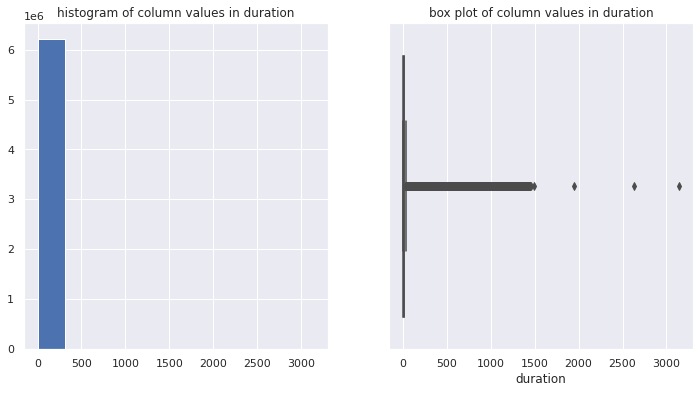

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


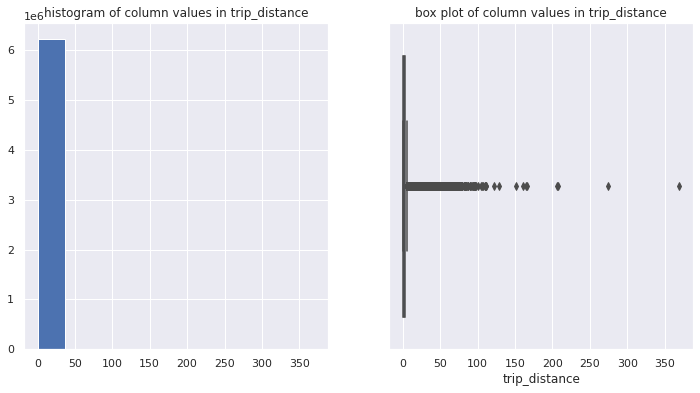

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


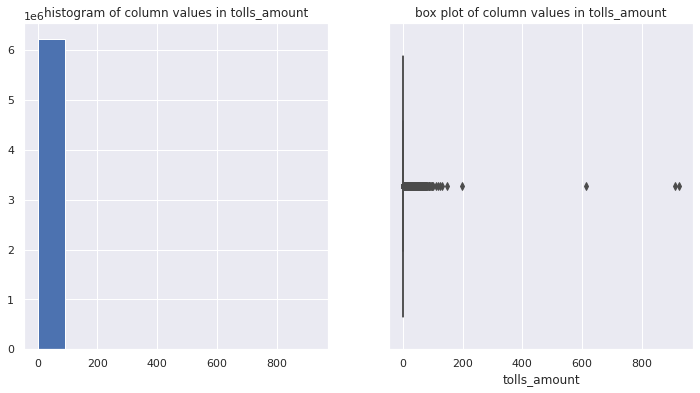

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(trip_data[feature])
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(trip_data[feature],ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

In [ ]:
# use .describe() again to show the statistics for these continuous variables
trip_data[continuous_columns].describe()

,fare_amount,tip_amount,total_tax,total_amount,duration,trip_distance,tolls_amount
count,6.230547e+06,6.230547e+06,6.230547e+06,6.230547e+06,6.230547e+06,6.230547e+06,6.230547e+06
mean,1.253629e+01,2.244589e+00,1.896865e+00,1.855585e+01,1.605080e+01,2.792375e+00,3.185023e-01
std,1.164688e+01,2.667936e+00,1.251271e+00,1.421300e+01,6.156064e+01,3.640340e+00,1.659479e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.500000e+00,0.000000e+00,8.000000e-01,1.130000e+01,6.533333e+00,9.600000e-01,0.000000e+00
50%,9.000000e+00,1.960000e+00,1.300000e+00,1.430000e+01,1.076667e+01,1.600000e+00,0.000000e+00
75%,1.400000e+01,2.950000e+00,3.300000e+00,1.980000e+01,1.718333e+01,2.870000e+00,0.000000e+00
max,6.052000e+03,5.490200e+02,9.086000e+01,6.061420e+03,3.147617e+03,3.699400e+02,9.255000e+02


we need to improve the look of histograms and box plots further as we are not able to clearly observe the distribution.

We will filter all the data for each feature with values less than 90% ile. Then plot that data as shown below

In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv',index = False)

In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,12.950000,0,0,Saturday,1.3
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,32.816667,0,1,Saturday,3.8
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,11.733333,0,0,Saturday,3.8
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,24.066667,0,0,Saturday,1.3
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,Cash,9.5,0.00,0.0,10.80,9.766667,0,1,Saturday,1.3


In [ ]:
continuous_columns = ['fare_amount','tip_amount','total_tax','total_amount','duration','trip_distance','tolls_amount']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


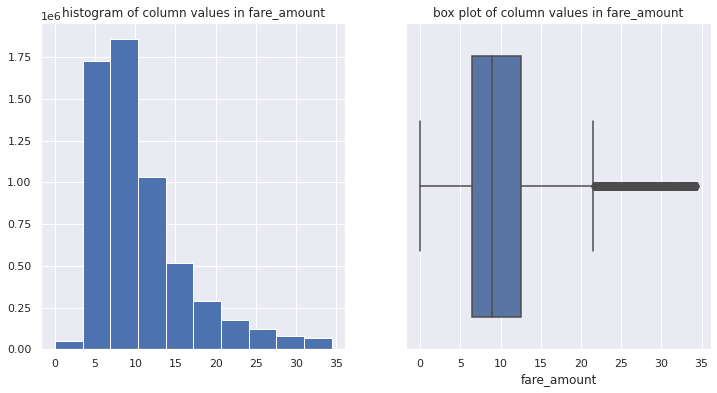

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


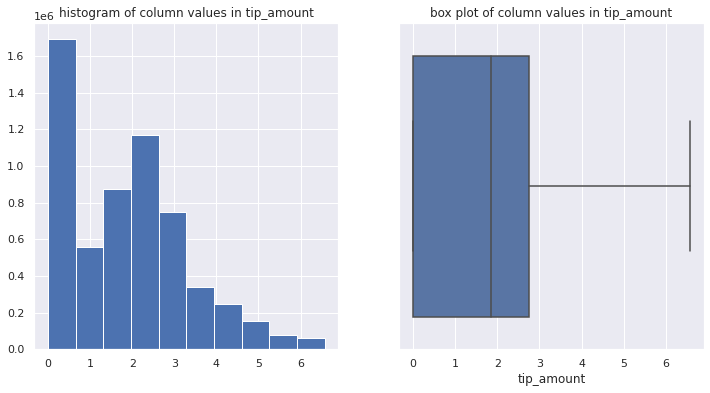

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


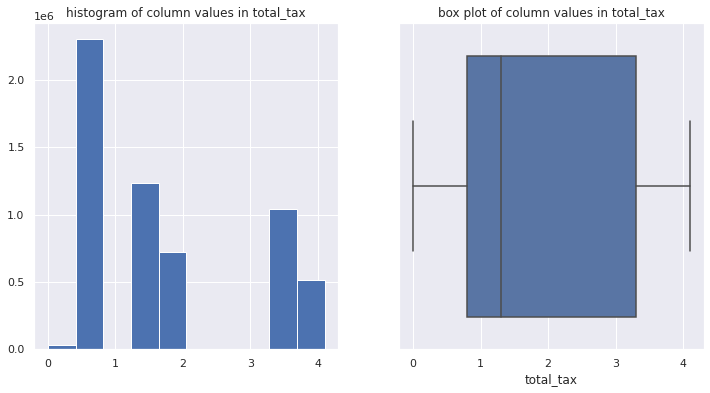

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


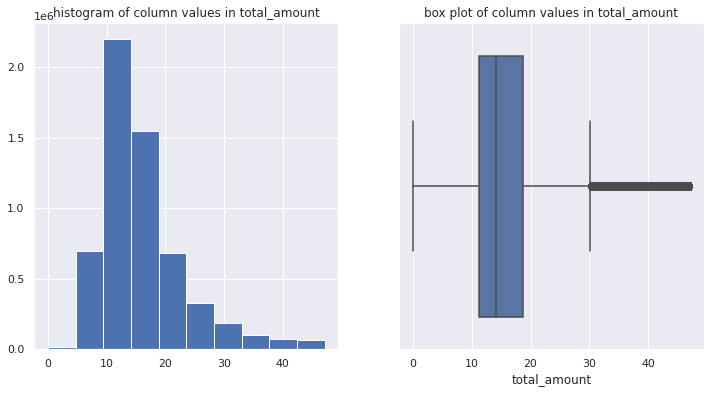

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


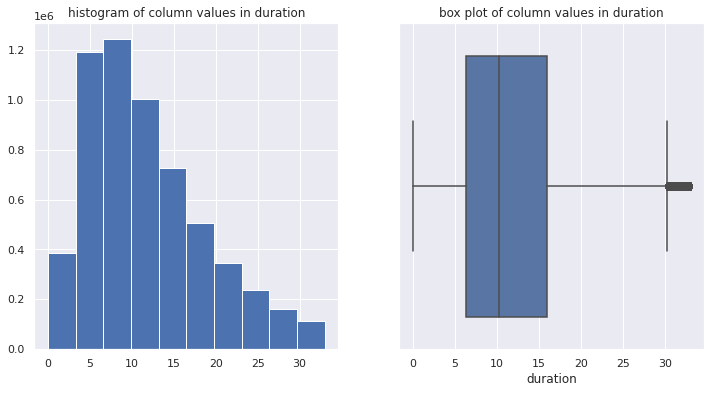

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


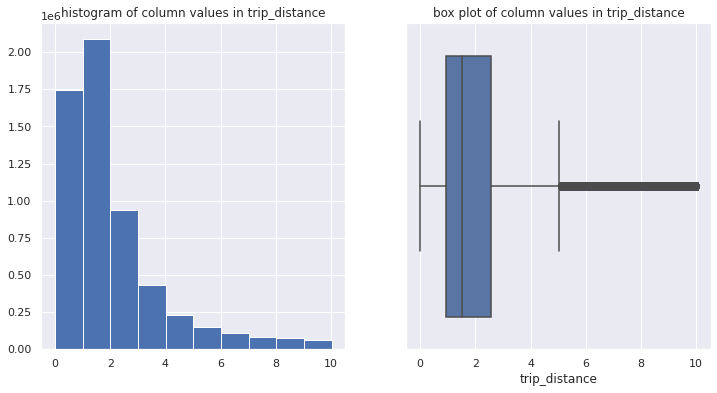

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


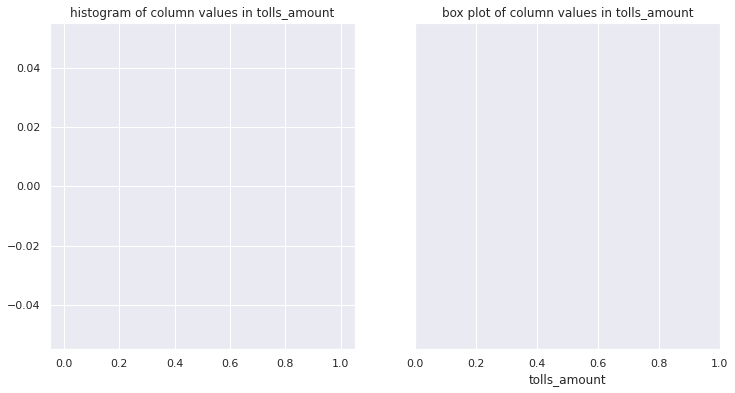

In [ ]:
# for loop for continuous_columns variable
for feature in continuous_columns:
    # removing the outliers
    feature_data_percentile = trip_data[feature].quantile(0.95)
    feature_data = trip_data.loc[trip_data[feature]<feature_data_percentile,feature]
    fig,ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].hist(feature_data)
    ax[0].set_title('histogram of column values in '+feature)
    sns.boxplot(feature_data,ax=ax[1])
    # using ax2.set_title for box plot
    ax[1].set_title('box plot of column values in '+feature)
    # seaborn style setting
    sns.set()
    # matplotlib command for displaying plots
    plt.show()

Looking from the above histograms and box plots we can decipher following information for each column

fare_amount - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 6000 dollars.

tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 560 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.

total_amount - most of the total_amount values is within 14.5 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.

duration - most of the values in duration is within 12 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3000 minutes.

trip_distance - most of the trip_distance is within 1.60 miles value as is shown by the median. The outlier in this case is about 350 miles. 

In [ ]:
categorical_variables = ['payment_type','trip_pickup_hour','trip_dropoff_hour','trip_day','PULocationID','DOLocationID']

In [ ]:
# start exploration with payment_type using .value_counts()
trip_data['payment_type'].value_counts()

Credit_card    4705717
Cash           1490839
No_charge        25135
Dispute           8856
Name: payment_type, dtype: int64

In [ ]:
# but this is a series for ease of plotting we need to use dataframe using .reset_index() on value_counts()
payment_type_category_count = trip_data['payment_type'].value_counts().reset_index()
# print the above dataframe
payment_type_category_count

,index,payment_type
0,Credit_card,4705717
1,Cash,1490839
2,No_charge,25135
3,Dispute,8856


In [ ]:
# we are shown the count under each category but it is better to have count% for comparison - create count_percent col
payment_type_category_count['count_percent'] = (payment_type_category_count['payment_type']/trip_data.shape[0])*100
# print the data frame
payment_type_category_count

,index,payment_type,count_percent
0,Credit_card,4705717,75.526547
1,Cash,1490839,23.927899
2,No_charge,25135,0.403416
3,Dispute,8856,0.142138


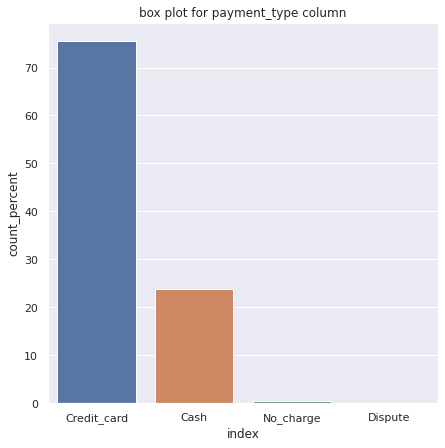

In [ ]:
# now let's plot it as bar chart
# first step - create fig, ax object using plt.subplots
fig,ax = plt.subplots(figsize=(7,7))
# second step - use sns.barplot(x, y , data, ax) for plotting bar plot
sns.barplot(x = 'index', y = 'count_percent', data=payment_type_category_count,ax=ax)
# third step - use ax object to change plot properties - here we set a title with ax.set_title()
ax.set_title('box plot for payment_type column')
# third step - seaborn style setting
sns.set()
# fourth step - use plt.show() for showing the plots
plt.show()

From above we can understand that most of the payments are done through cash and credit cards. The proportion of credit card payments is around 70%.

Now we look into time based categorical variables.

'trip_pickup_hour'
'trip_dropoff_hour'
'trip_day'

Number of categories in feature trip_pickup_hour is 24


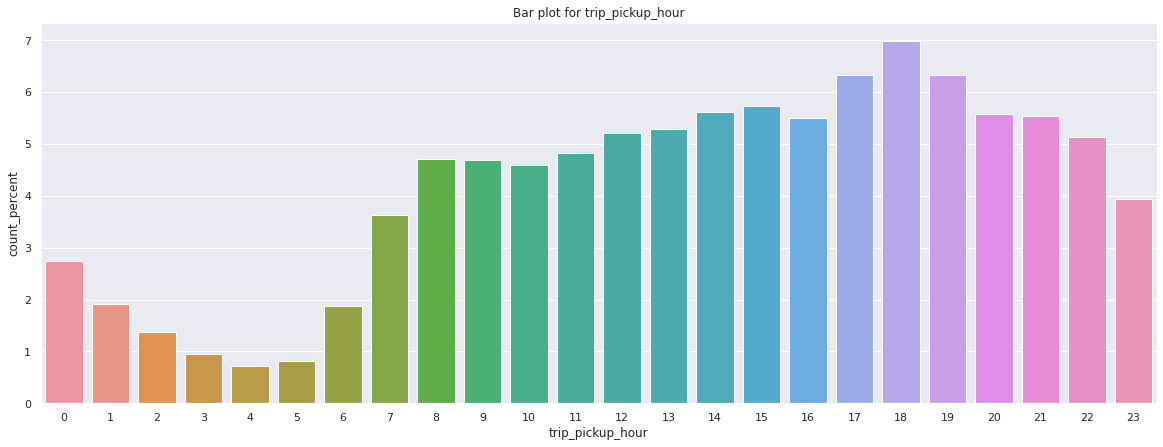

Number of categories in feature trip_dropoff_hour is 24


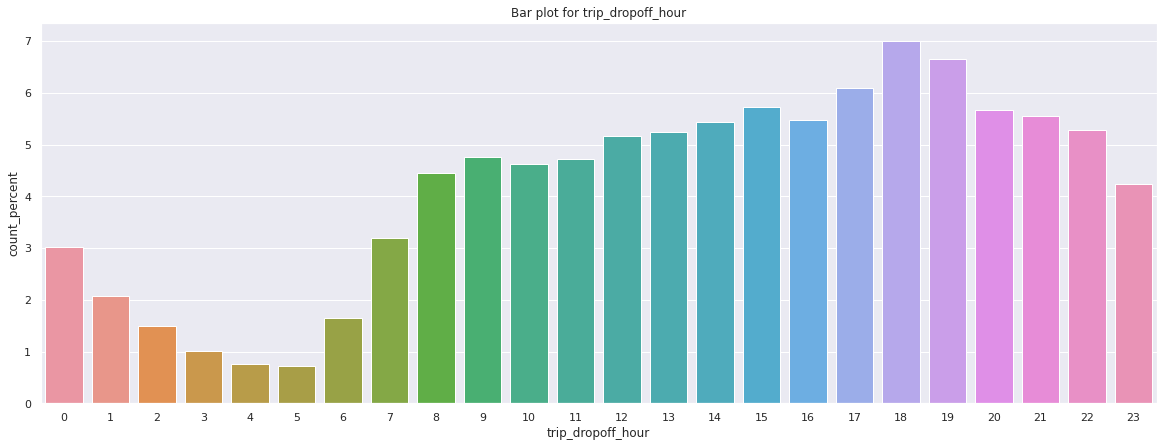

Number of categories in feature trip_day is 7


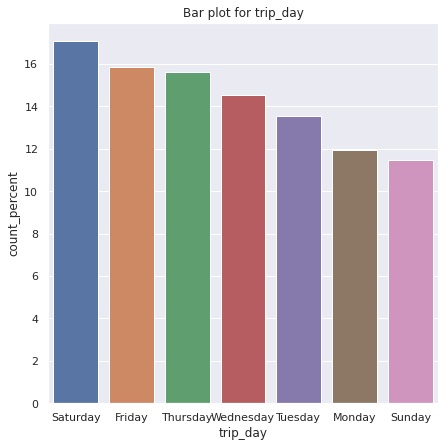

In [ ]:
# now let's plot all the time based categorical variables in this way using a for loop
for feature in ['trip_pickup_hour','trip_dropoff_hour','trip_day']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    if feature_value_counts.shape[0]<10:
        fig,ax = plt.subplots(figsize=(7,7))
    else:
        fig,ax = plt.subplots(figsize=(20,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

Based on above plots we can observe following things

Trip Hour
1) The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 11 min.

2) Peak hour for the pick up and drop off is around evening from 5 to 7. The busiest time is 6PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

1)Sunday has the lowest taxi uses while saturday is the busiest.

2)Weekdays except Monday have heavy taxi uses.

Moving on we will explore the distribution of location based features:

'PULocationID'

'DOLocationID'

In [ ]:
# let's see the number of categories available in both pickup and dropoff location - PULocationID and DOLocationID
print(trip_data['PULocationID'].value_counts().shape)
print(trip_data['DOLocationID'].value_counts().shape)

(259,)
(261,)


So we have around 260 categories for location. To plot it on bar plots we need to increase the figure size.

Number of categories in feature PULocationID is 259


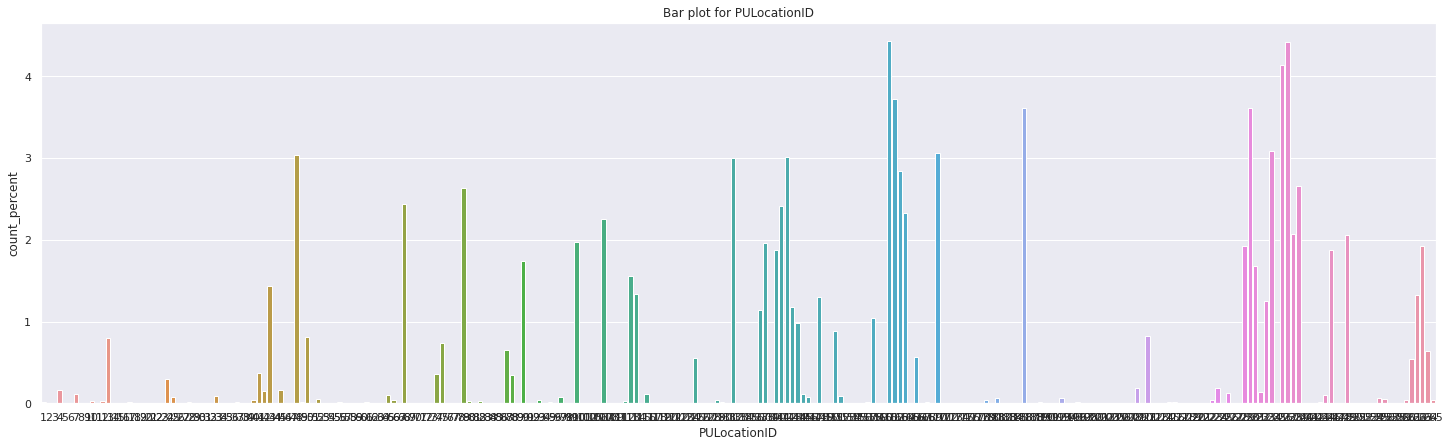

Number of categories in feature DOLocationID is 261


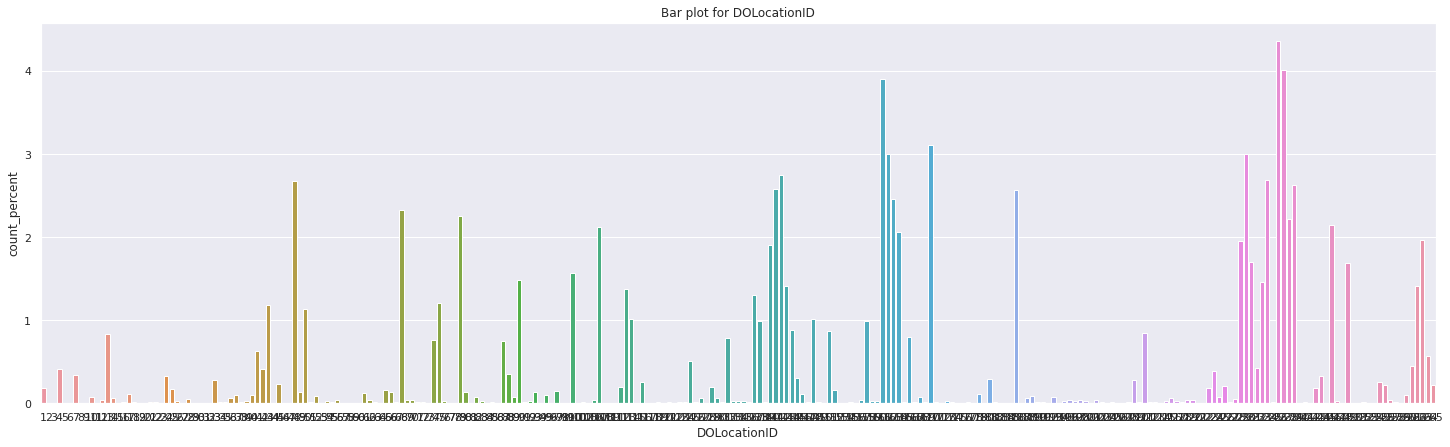

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    # Create a dataframe for the feature using value_counts().reset_index()
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    # create count_percent column 
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # print the number of categories in the feature
    print('Number of categories in feature '+ feature + ' is ' + str(feature_value_counts.shape[0]))
    # Create fig,ax object using plt.subplots 
    fig,ax = plt.subplots(figsize=(25,7))
    # plot barplot x='index' and y='count_percent' using sns.barplot
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    # set_title
    ax.set_title('Bar plot for '+ feature)
    # set_xlabel
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

The above plots looks quite messy but one insight that we can indetify from above plot that most of pickup and dropoff points do not have more 0.5% traffic (0.5 percent of 8755612 total trips is 43778).

So in our next plot we will filter out these pickup and dropoff points to look into the graph more clearly.

Number of categories in feature PULocationID above 0.5 % count is 48


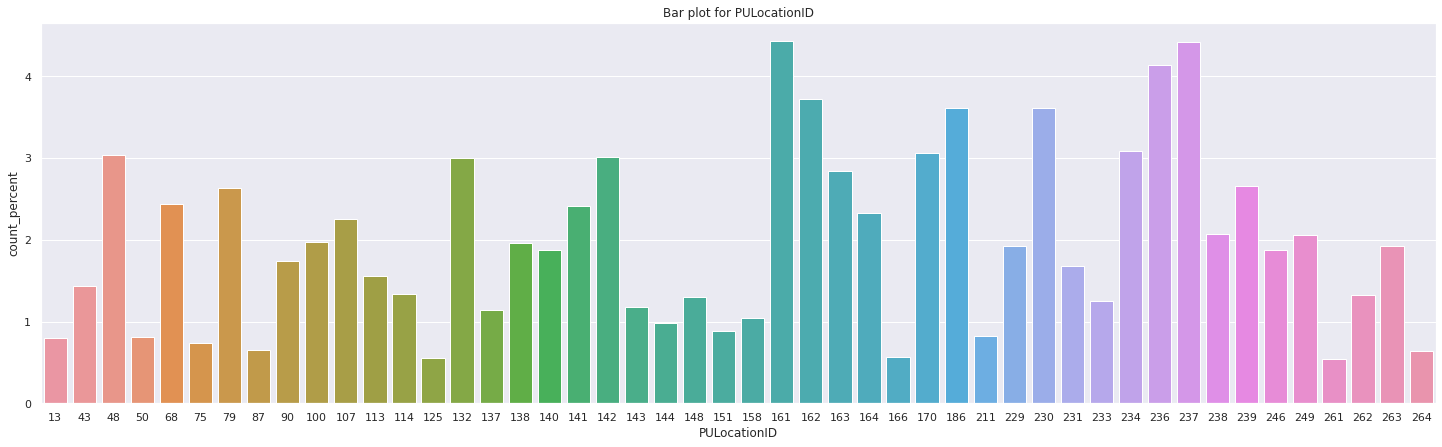

Number of categories in feature DOLocationID above 0.5 % count is 49


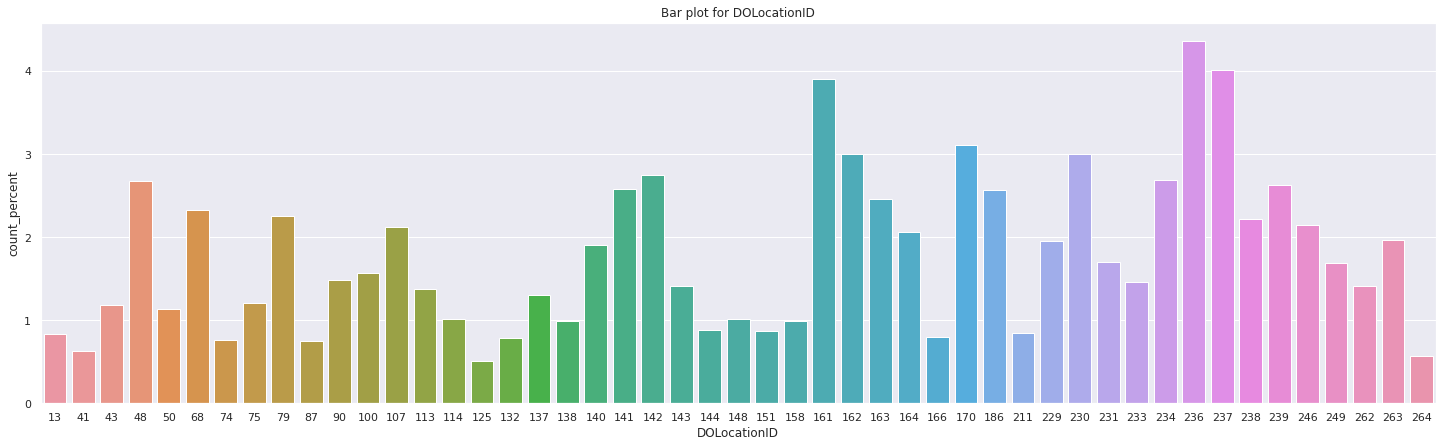

In [ ]:
for feature in ['PULocationID','DOLocationID']:
    feature_value_counts = trip_data[feature].value_counts().reset_index()
    feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
    # filter only those location which has more than 0.5 % of traffic
    feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.5]
    print('Number of categories in feature '+ feature + ' above 0.5 % count is ' + str(feature_value_counts.shape[0]))
    fig,ax = plt.subplots(figsize=(25,7))
    sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
    ax.set_title('Bar plot for '+ feature)
    ax.set_xlabel(feature)
    sns.set()
    plt.show()

From the above plots we can glance following insights

The busiest location in terms of pickup are 161, 237 and 236

The busiest location for dropoff too are 236 , 237 and 161 but order is some what different.
We can also look for routes which are busiest.

For exploring busy routes we need to create a new route column which is a combination of pickup and dropoff point.

So route = 'PULocationID'-'DULocationID'

In [ ]:
# create routes column using PULocationID and DOLocationID with lambda function
trip_data['routes'] = trip_data.apply(lambda x: str(x['PULocationID'])+'-'+str(x['DOLocationID']),axis=1)

In [ ]:
trip_data['routes'].head()

0      145-7
1      45-61
2    186-140
3    144-140
4    238-152
Name: routes, dtype: object

In [ ]:
trip_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6230547 entries, 0 to 6250532
Data columns (total 17 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   tpep_pickup_datetime   datetime64[ns]
 1   tpep_dropoff_datetime  datetime64[ns]
 2   passenger_count        int64         
 3   trip_distance          float64       
 4   PULocationID           int64         
 5   DOLocationID           int64         
 6   payment_type           object        
 7   fare_amount            float64       
 8   tip_amount             float64       
 9   tolls_amount           float64       
 10  total_amount           float64       
 11  duration               float64       
 12  trip_pickup_hour       int64         
 13  trip_dropoff_hour      int64         
 14  trip_day               object        
 15  total_tax              float64       
 16  routes                 object        
dtypes: datetime64[ns](2), float64(7), int64(5), object(3)
memory usag

In [ ]:
trip_data.to_csv('/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv',index=False)

Number of categories in feature routes above 0.25 % count is 14


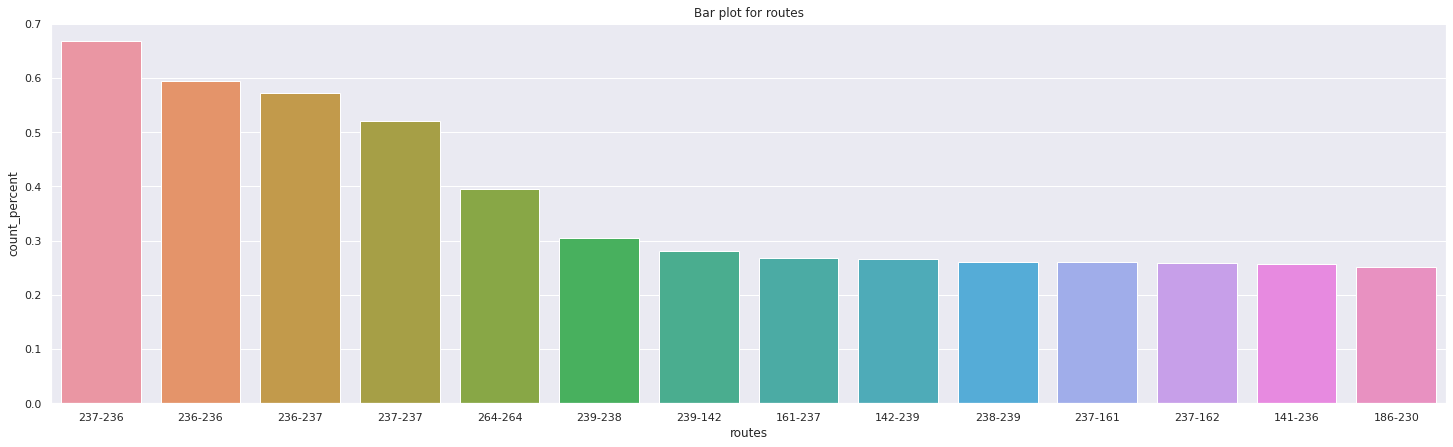

In [ ]:
# plot bar plot for routes which have trip count above 0.25%
feature = 'routes'
feature_value_counts = trip_data[feature].value_counts().reset_index()
feature_value_counts['count_percent'] = (feature_value_counts[feature]/trip_data.shape[0])*100
# choosing routes where the trip percent is above 0.25% of total trips
feature_value_counts = feature_value_counts.loc[feature_value_counts['count_percent']>=0.25]
print('Number of categories in feature '+ feature + ' above 0.25 % count is ' + str(feature_value_counts.shape[0]))
fig,ax = plt.subplots(figsize=(25,7))
sns.barplot(x='index',y='count_percent',data=feature_value_counts,ax=ax)
ax.set_title('Bar plot for '+ feature)
ax.set_xlabel(feature)
sns.set()
plt.show()

From the above plot we can observe that 5 busiest route are following:

237-236

236-236

236-237

237-237

In [ ]:
trip_data['passenger_count'].value_counts()

1    4480142
2     923689
3     240845
5     218531
6     128466
0     123567
4     115256
7         26
8         18
9          7
Name: passenger_count, dtype: int64

Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

# Bivariate Analysis


Remember that we made some analysis points regarding exploration of duration and pricing:

For pricing we will be exploring it's relationship with:

hour/day of trip

pickup location of trip

For duration we will be exploring it's relationship with:

hour of day

pickup location of trip

PRICING EXPLORATION

We have following variables in the dataset that is associated with pricing:

fare_amount

tip_amount

total_taxes

tolls_amount

total_amount

In our anlaysis for now we will be focussing on:

fare_amount

tip_amount

total_taxes

total_amount

we are leaving tolls_amount for now from our analysis as it contributes very little to the total_amount value because it's median value was 0 i.e. most of the trips are not paying tolls_amount.

* PRICING VARIABLE EXPLORATION WITH HOUR/DAY OF TRIP *

All of our pricing variables are continuous and Hour/Day is categorical.

The way to explore relationship between a continuous variable and categorical variable is through a box plot. 
We create box plot for each category of categorical variable.

so as to see how the distribution changes for the continuous variables as the category values changes for categorical variable.

We will start with fare_amount exploration.

Let's do a box plot of fair_amount with hour/day of trip to see how the fare changes for different hours of the day and for different days of the week

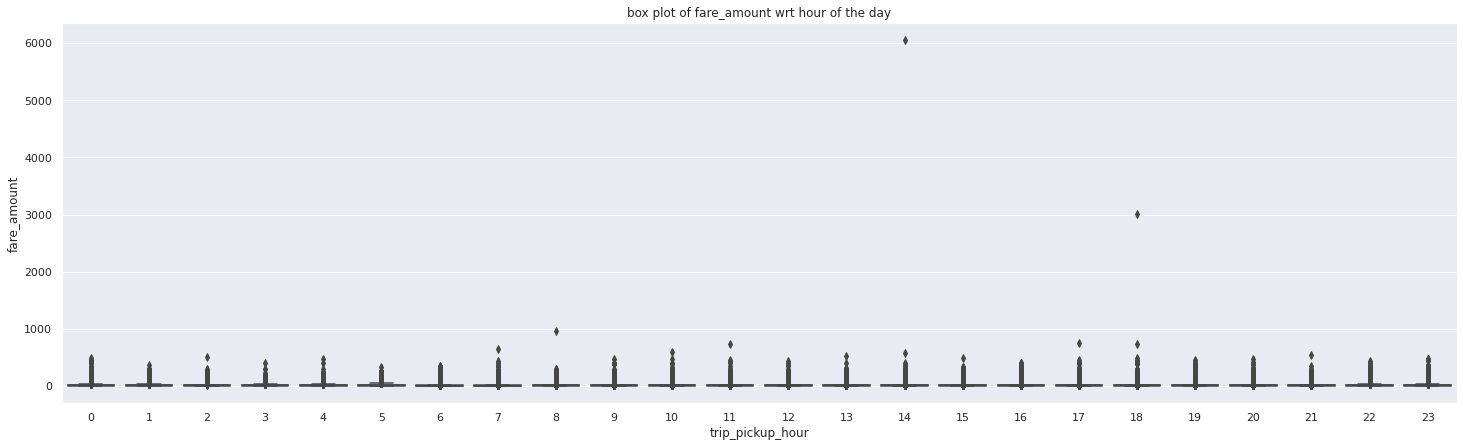

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

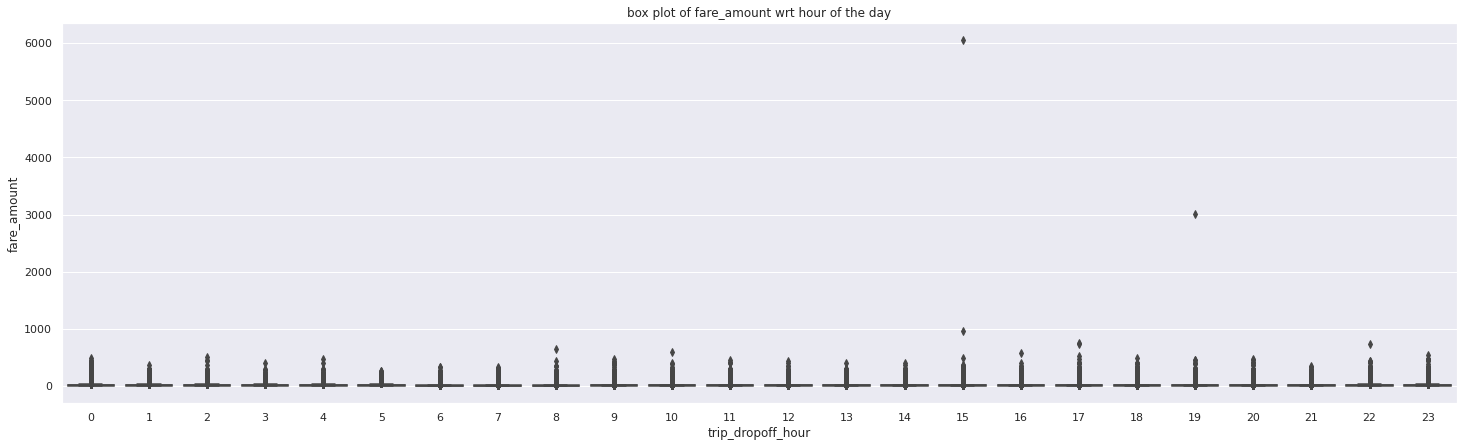

In [ ]:
# fig,ax object using plt.subplots()
fig,ax = plt.subplots(figsize=(25,7))
# box plot using - sns.boxplot(x, y , data, ax)
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=trip_data,ax=ax)
# ax.set_title
ax.set_title('box plot of fare_amount wrt hour of the day')
# seaborn style setting
sns.set()
# matplotlib plt.show()
plt.show()

From the above plot we can observe that most of the outliers in fare happens during 14 or 2PM to 18 or 6PM based on pickup time.

From the above plot trip_dropoff_hour outliers happens during 15 or 3PM to 19 or 7PM based on pickup time.

For observing the distribution in a better way we would restrict the fare_amount to below 50 dollars.

In [ ]:
# restricted_fare_amount_data dataframe formation by filtering fare_amount less than 50 dollars
restricted_fare_amount_data = trip_data.loc[(trip_data['fare_amount']<=50) & (trip_data['fare_amount']>=0)]
restricted_fare_amount_data.shape

(6031463, 17)

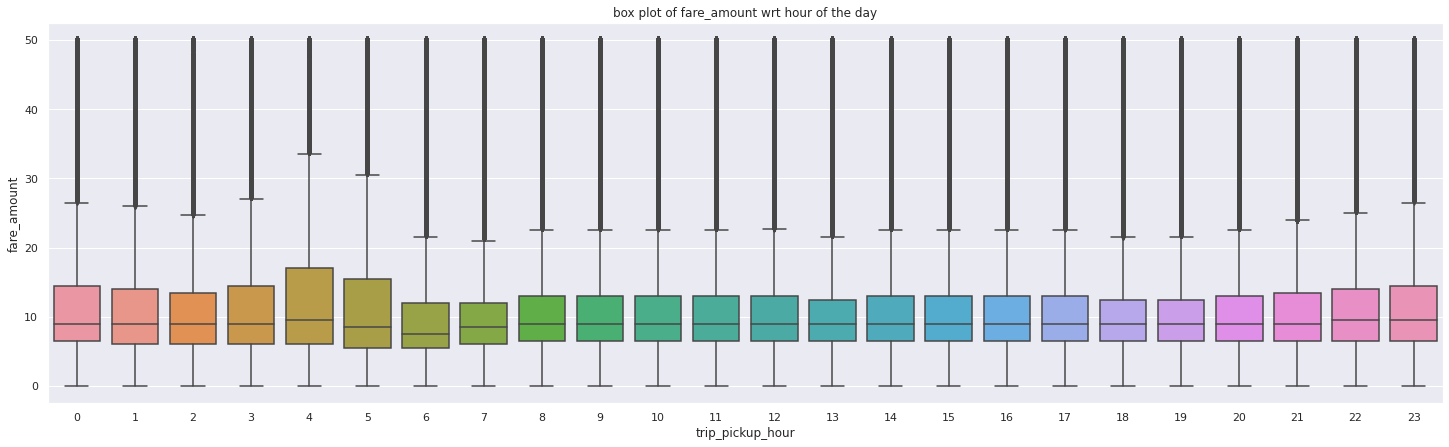

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

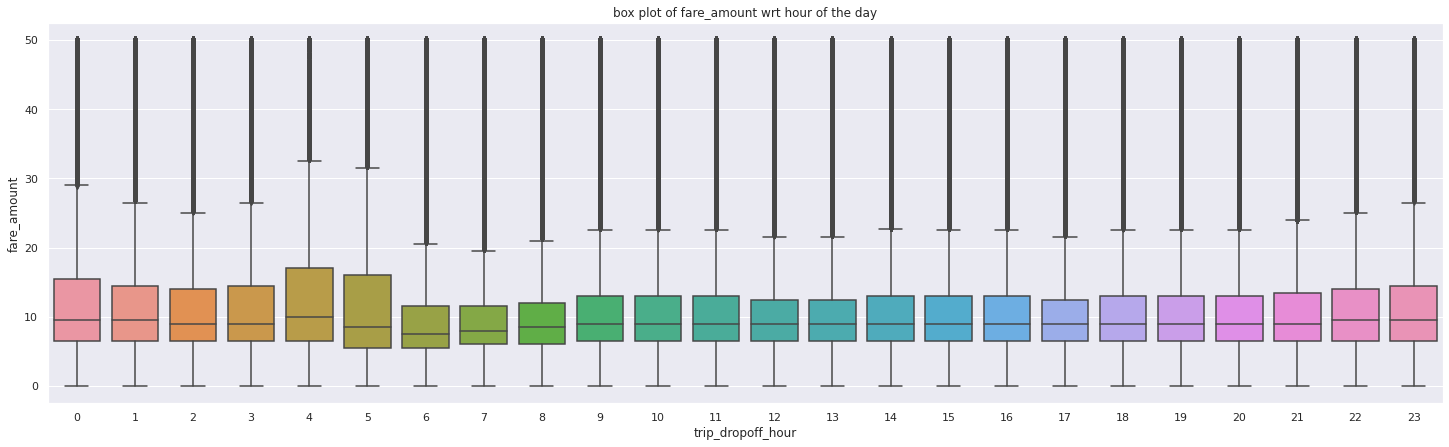

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt hour of the day')
sns.set()
plt.show()

We can see from the plots that trip pickup and dropoff hours do not have much affect on median fare_amount as median is almost same for all the hours.(but fare amount between 5 A.M to 6 A.M is little less than the remaining hour)


let's us see if hour of day has any effect on other pricing related variables or not.

Starting with total_amount

In [ ]:
restricted_tip_amount_data = trip_data.loc[trip_data['tip_amount']<10]
restricted_total_taxes_data = trip_data.loc[trip_data['total_tax']<10]

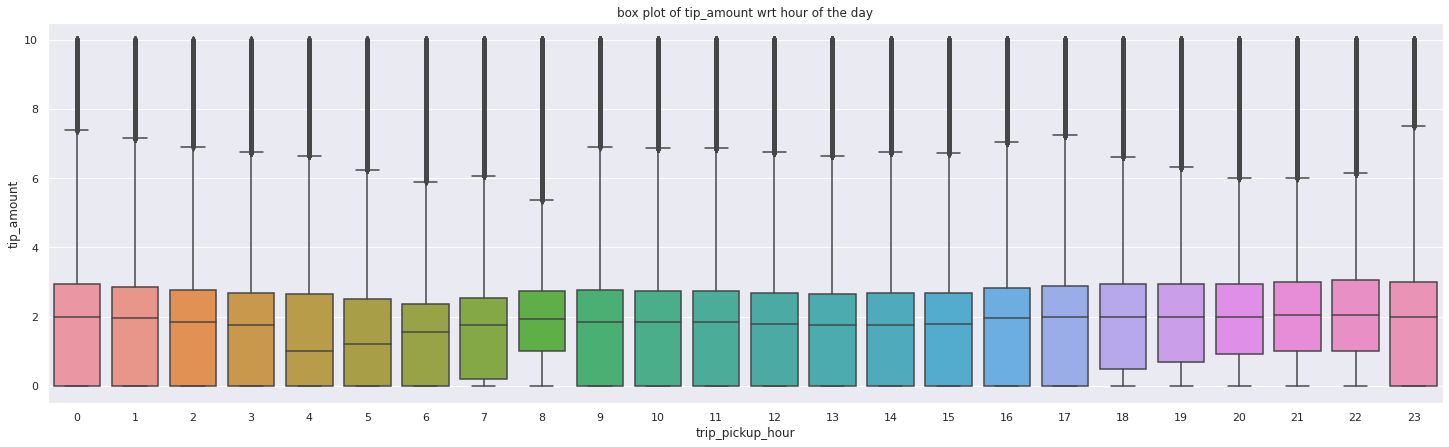

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

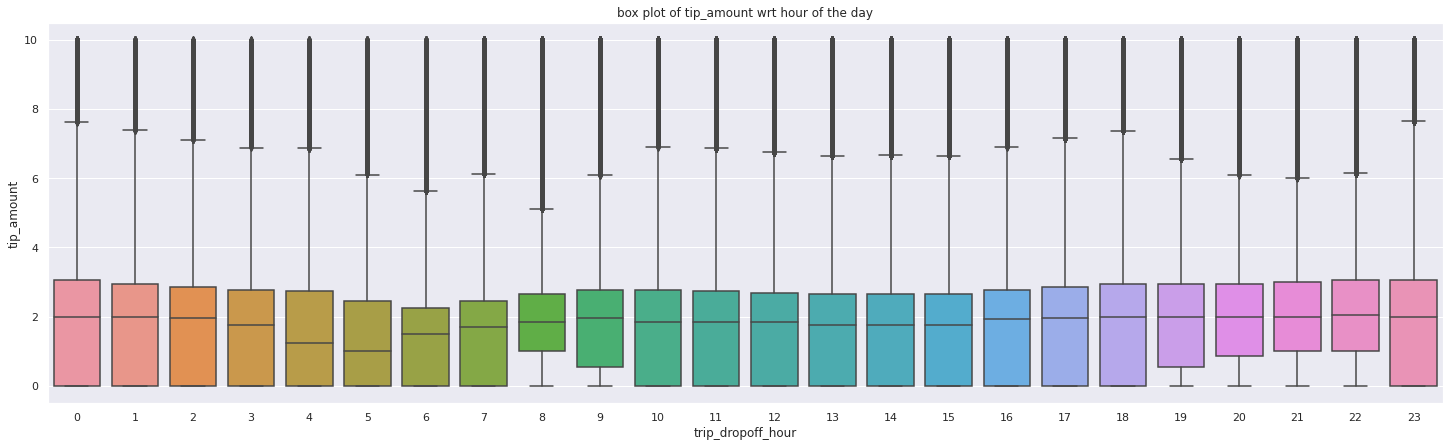

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt hour of the day')
sns.set()
plt.show()

Based on tip_amount plot we can see that tip_amount too does not vary much based on hours. but one pattern we can say that tip is llittle large at late nights as compared to early mornings

Let's observe total_taxes now



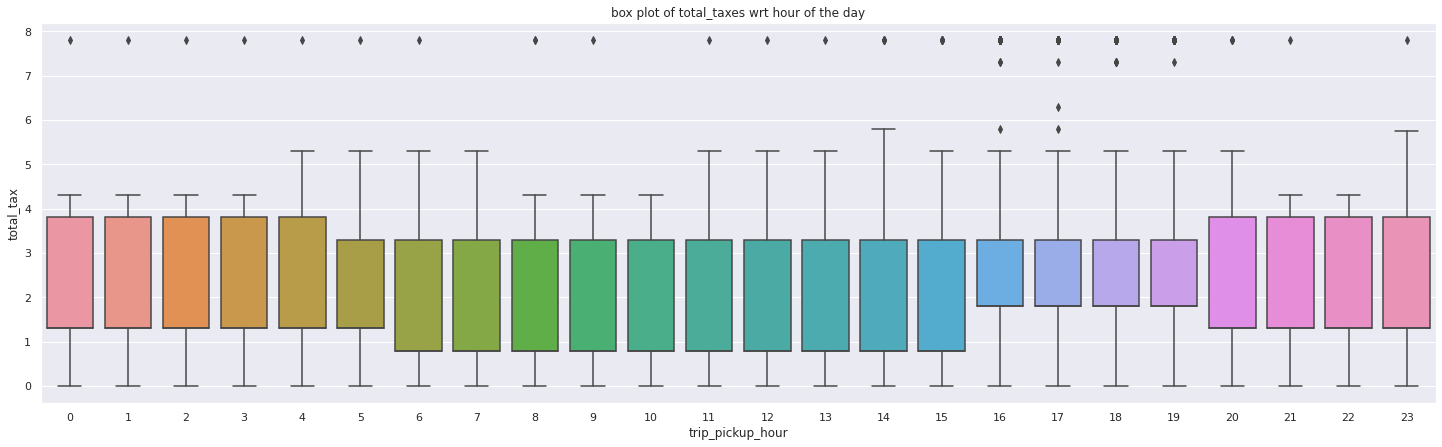

In [ ]:
# total_taxes = extra + improvement_surcharges + Mta

fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_pickup_hour',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

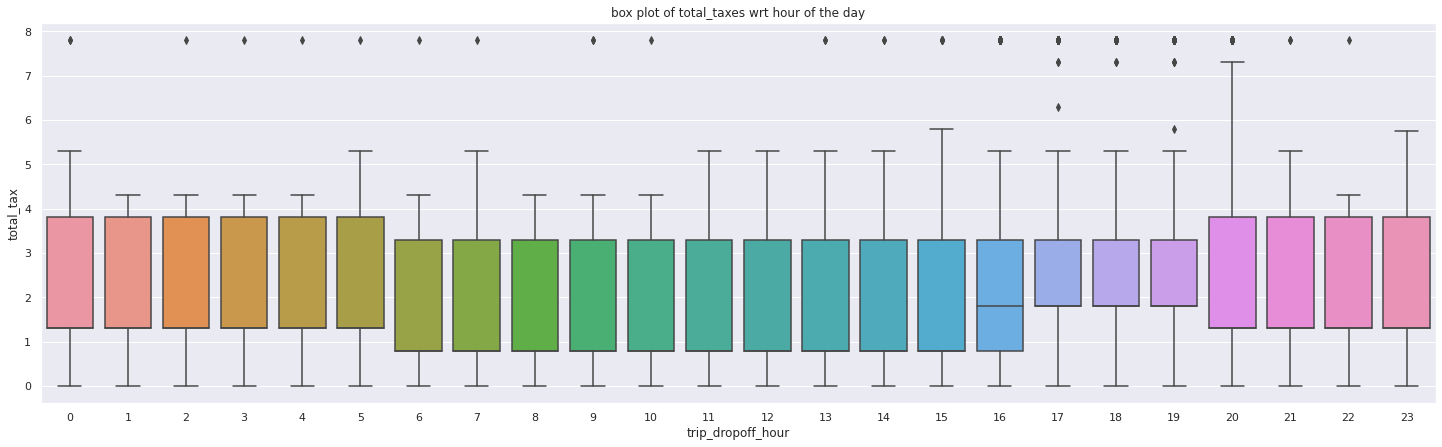

In [ ]:
fig,ax = plt.subplots(figsize=(25,7))
sns.boxplot(x = 'trip_dropoff_hour',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt hour of the day')
sns.set()
plt.show()

Now in this plot we can clearly observe that total_taxes change significantly with hour of the day. 

There are two patterns that we can observe here:

1)from the hour 8PM to 5AM the median taxes seem to be a bit higher than other 
hours, it may be due to some overnight surcharges.


2) Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.


Overall the effect of hour of day is most clearly visible on total_taxes. we have two insights about how taxes change with hours


1)Overnight charges are applied between 8PM to 5AM

2)Evening has higher variability in taxes and the taxes are usually high.


Let's move and explore the distribution of pricing variables with respect to day of week. For this analysis we will be using restricited version of dataset that we built for fare_amount, total_amount, tip_amount and total_taxes.

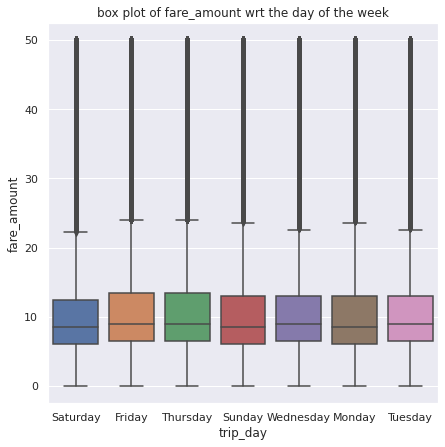

In [ ]:
# plot of trip_day with fare_amount
fig,ax = plt.subplots(figsize=(7,7))
# changes in sns.boxplot x and y
sns.boxplot(x = 'trip_day',y='fare_amount',data=restricted_fare_amount_data,ax=ax)
ax.set_title('box plot of fare_amount wrt the day of the week')
sns.set()
plt.show()

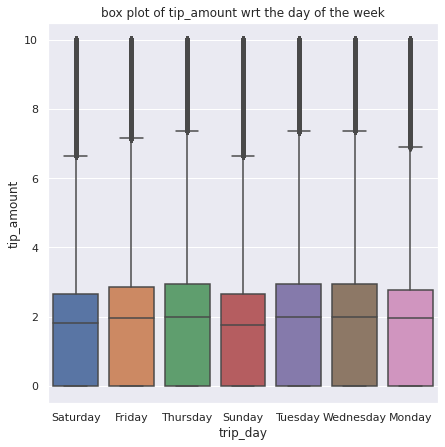

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='tip_amount',data=restricted_tip_amount_data,ax=ax)
ax.set_title('box plot of tip_amount wrt the day of the week')
sns.set()
plt.show()

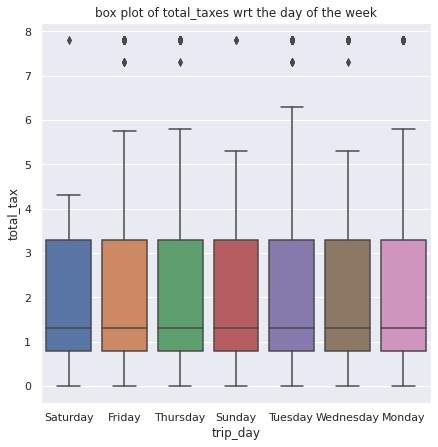

In [ ]:
fig,ax = plt.subplots(figsize=(7,7))
sns.boxplot(x = 'trip_day',y='total_tax',data=restricted_total_taxes_data,ax=ax)
ax.set_title('box plot of total_taxes wrt the day of the week')
sns.set()
plt.show()

We can see that pricing overall does not change much with respect to day of week.

* PRICING VARIABLE EXPLORATION WITH LOCATION OF TRIP *

Here we will look into the price changes for the most frequent trip pickup locations.

In [ ]:
# create a new series using value_counts() on 'PULocationID'
pickup_location_value_counts = trip_data['PULocationID'].value_counts()
# show the series
pickup_location_value_counts.head()

161    276062
237    275068
236    257605
162    231538
230    224915
Name: PULocationID, dtype: int64

In [ ]:
# top 10 frequent pickup locations using .nlargest(10).index
top_10_frequent_pickup_locations = pickup_location_value_counts.nlargest(10).index
top_10_frequent_pickup_locations

Int64Index([161, 237, 236, 162, 230, 186, 234, 170, 48, 142], dtype='int64')

The median fare_amount of trips taken from 161 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


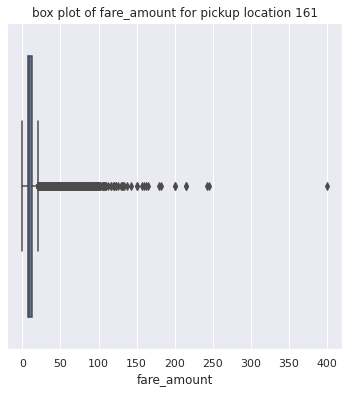

The median fare_amount of trips taken from 237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


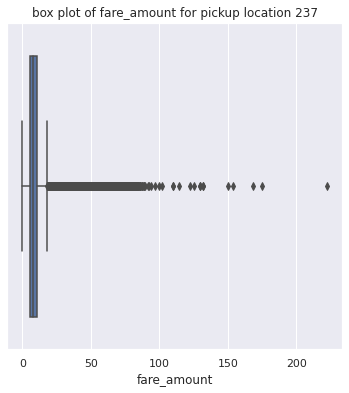

The median fare_amount of trips taken from 236 is 8.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


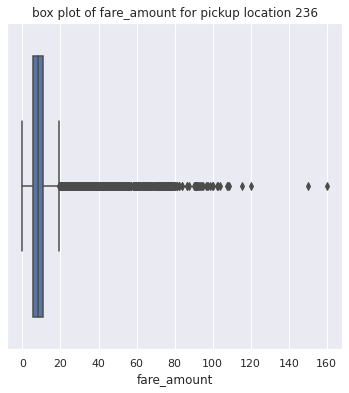

The median fare_amount of trips taken from 162 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


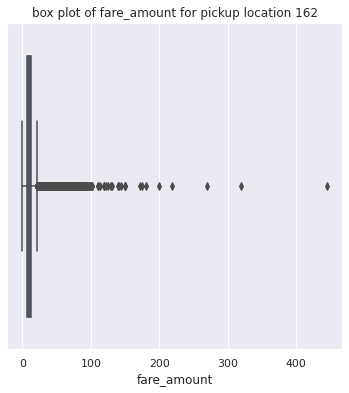

The median fare_amount of trips taken from 230 is 9.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


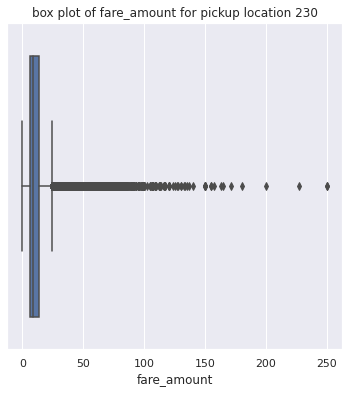

The median fare_amount of trips taken from 186 is 10.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


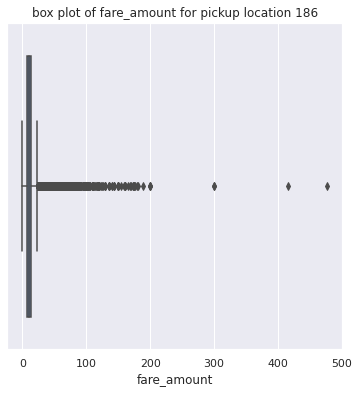

The median fare_amount of trips taken from 234 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


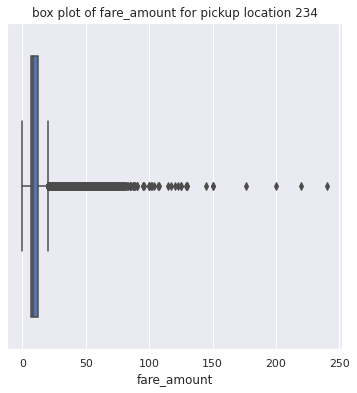

The median fare_amount of trips taken from 170 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


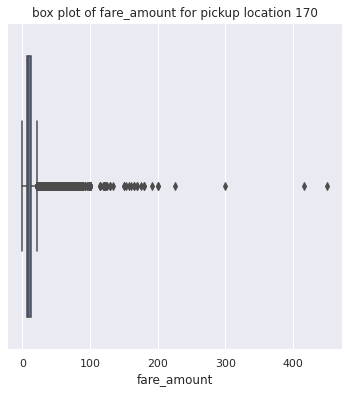

The median fare_amount of trips taken from 48 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


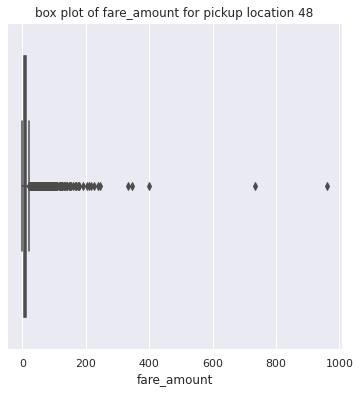

The median fare_amount of trips taken from 142 is 8.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


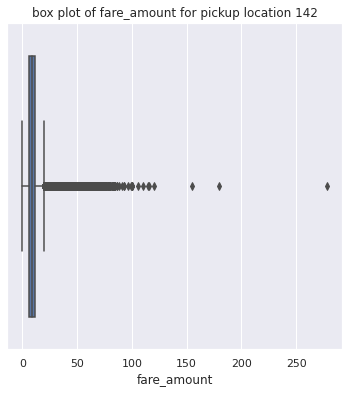

In [ ]:
# for loop for plotting box plot of each of the top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median fare_amount for the top_pickup_locID
    print('The median fare_amount of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['fare_amount'].median()))
    # fig,ax object
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of fare_amount from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

So from above plot we can observe that for one of the most busiest pickup location i.e 161 has median fare_amount is low in comparison to other 186 locations ID and also  oultier of 186 location ID is also high.and also we have location ID 162 and 230 has same fare amount as 161

This could be helpful in adjusting our revenue expectation based on putting our cabs in a given location because just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

#DURATION EXPLORATION

Here we will explore the duration of trip exploration with pickup hour of day.


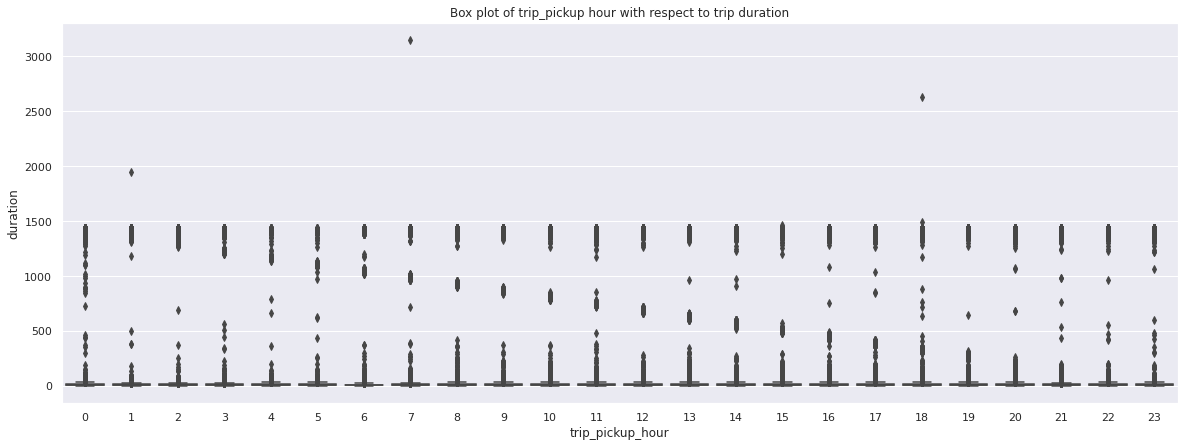

In [ ]:
# plot box plot for duration for different hours of day
fig,ax = plt.subplots(figsize=(20,7))
# box plot using sns.boxplot x is 'trip_pickup_hour' and y is 'duration'
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = trip_data,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Here again due to heavy outliers in duration data we are not able to observe the general graph. we might need to restrict our duration values to within 50min.

In [ ]:
# create restricted_duration dataframe with .loc on 'duration' column
restricted_duration= trip_data.loc[trip_data['duration']<50]
restricted_duration.shape

(6148506, 17)

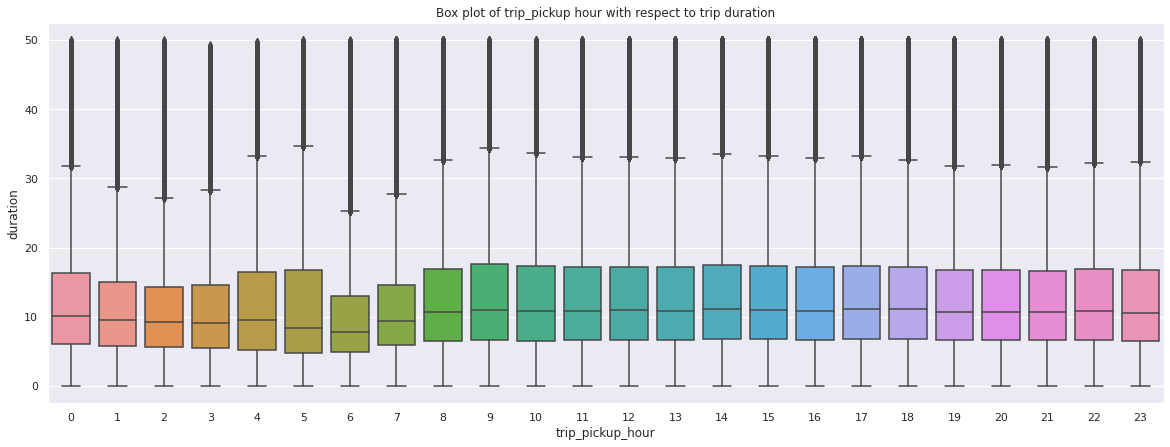

In [ ]:
fig,ax = plt.subplots(figsize=(20,7))
sns.boxplot(x = 'trip_pickup_hour', y='duration',data = restricted_duration,ax=ax)
ax.set_title('Box plot of trip_pickup hour with respect to trip duration')
sns.set()
plt.show()

Early morning hours of 5AM to 6AM have shorter duration trips

The median trip duration of trips taken from 161 is 11.6


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


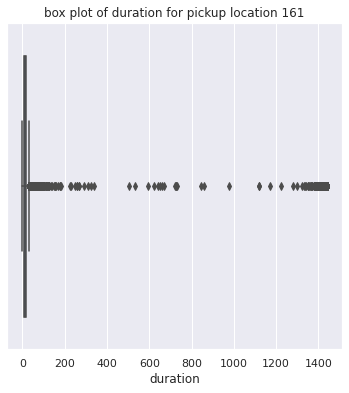

The median trip duration of trips taken from 237 is 8.45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


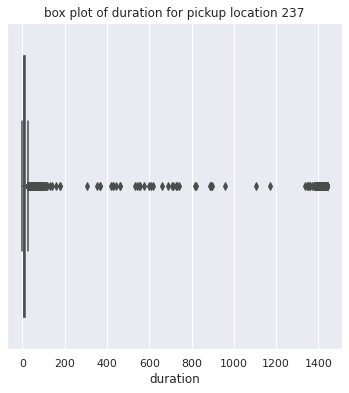

The median trip duration of trips taken from 236 is 8.583333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


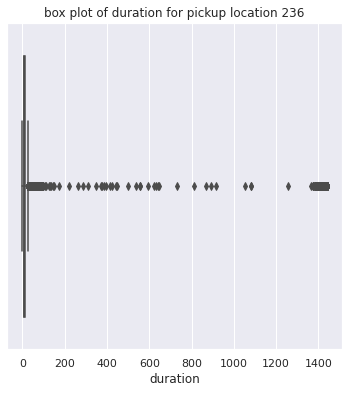

The median trip duration of trips taken from 162 is 11.183333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


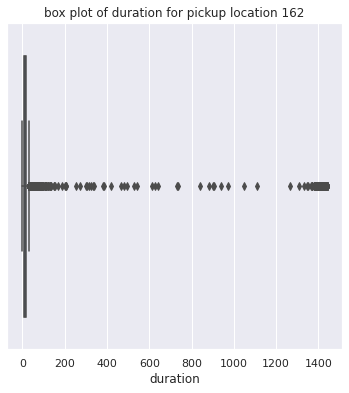

The median trip duration of trips taken from 230 is 11.166666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


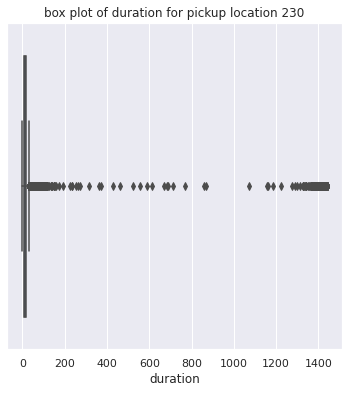

The median trip duration of trips taken from 186 is 13.133333333333333


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


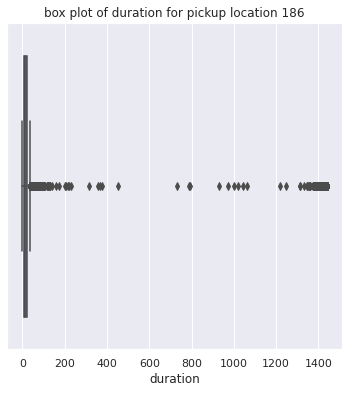

The median trip duration of trips taken from 234 is 10.666666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


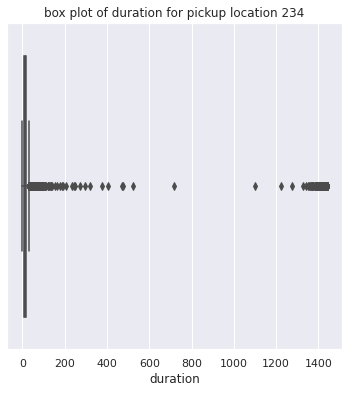

The median trip duration of trips taken from 170 is 10.616666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


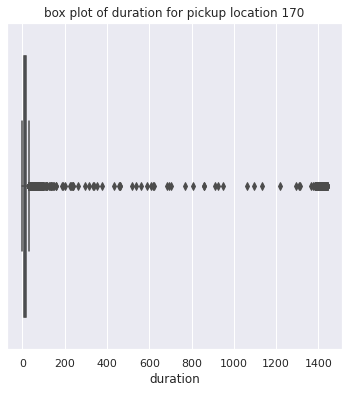

The median trip duration of trips taken from 48 is 9.7


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


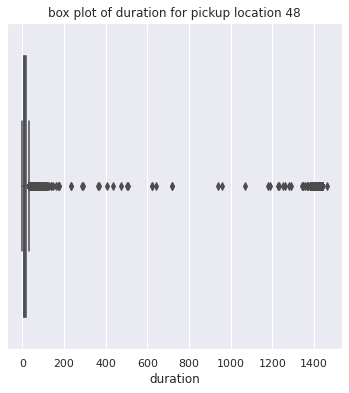

The median trip duration of trips taken from 142 is 9.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


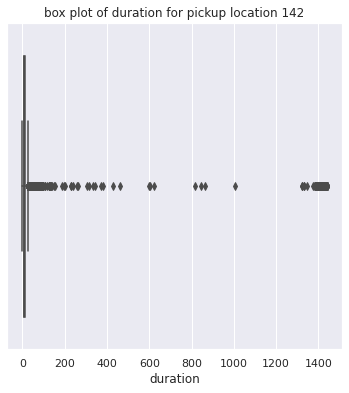

In [ ]:
# plot box plots of duration for top 10 frequent pickup locations
for top_pickup_locID in top_10_frequent_pickup_locations:
    # create the new dataframe for each location using .loc on 'PULocationID' - pickup_locID_dataframe
    pickup_locID_dataframe = trip_data.loc[trip_data['PULocationID'] == top_pickup_locID]
    # print the median duration for the top_pickup_locID
    print('The median trip duration of trips taken from '+str(top_pickup_locID)+' is '+str(pickup_locID_dataframe['duration'].median()))
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(pickup_locID_dataframe['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for pickup location '+ str(top_pickup_locID))
    sns.set()
    plt.show()

Here again we can see for the most frequent pickup location 161 the duration value is less in comparison to other pickup location with locationID 186, 186 has higher duration thats why it median far_amount is also higher.

#Analyse routes 


We could analyse routes with fare_amount or total_taxes and duration for different time of the day.


In [ ]:
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax,routes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,12.950000,0,0,Saturday,1.3,145-7
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,32.816667,0,1,Saturday,3.8,45-61
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,11.733333,0,0,Saturday,3.8,186-140
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,24.066667,0,0,Saturday,1.3,144-140
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,Cash,9.5,0.00,0.0,10.80,9.766667,0,1,Saturday,1.3,238-152


In [ ]:
trip_route_value_counts = trip_data['routes'].value_counts()

NameError: ignored

In [ ]:
trip_route_value_counts.head(10)

237-236    41642
236-236    37050
236-237    35679
237-237    32402
264-264    24642
239-238    18963
239-142    17527
161-237    16718
142-239    16524
238-239    16278
Name: routes, dtype: int64

In [ ]:
trip_route_top_10 = trip_route_value_counts.nlargest(10).index

In [ ]:
trip_route_top_10 

Index(['237-236', '236-236', '236-237', '237-237', '264-264', '239-238',
       '239-142', '161-237', '142-239', '238-239'],
      dtype='object')

the fare amount for the route 237-236 is 6.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


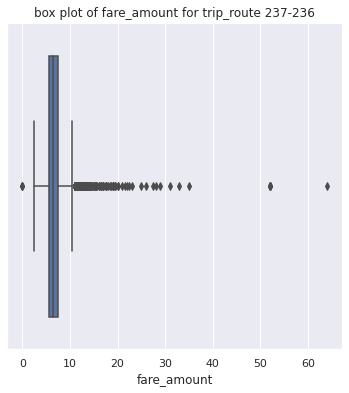

the fare amount for the route 236-236 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


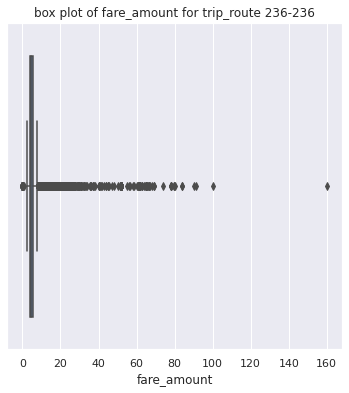

the fare amount for the route 236-237 is 6.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


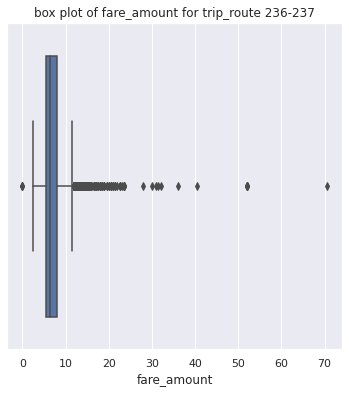

the fare amount for the route 237-237 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


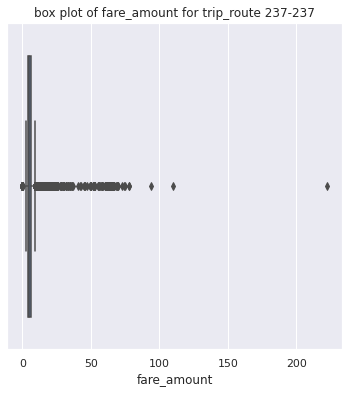

the fare amount for the route 264-264 is 9.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


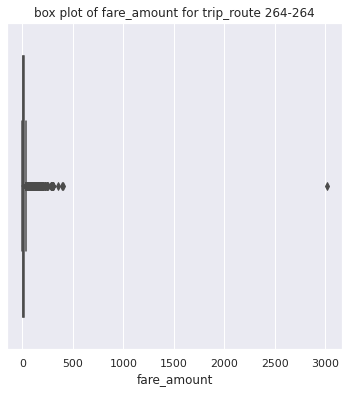

the fare amount for the route 239-238 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


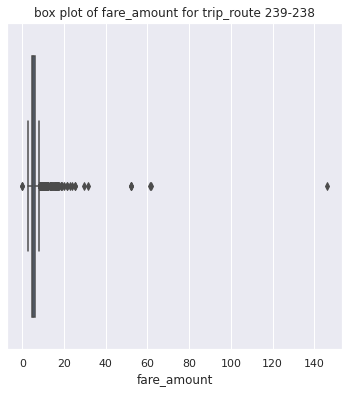

the fare amount for the route 239-142 is 5.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


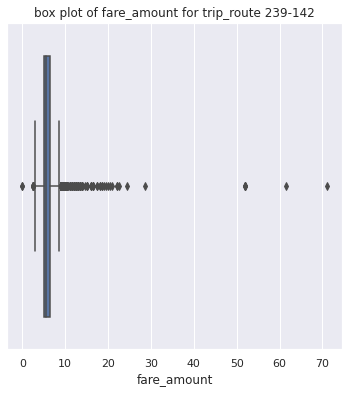

the fare amount for the route 161-237 is 7.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


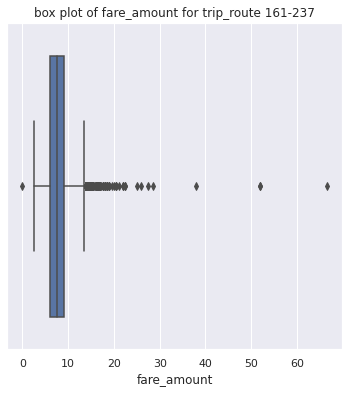

the fare amount for the route 142-239 is 6.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


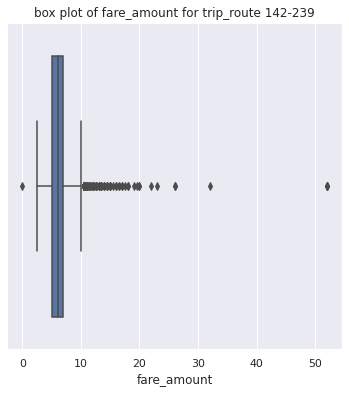

the fare amount for the route 238-239 is 5.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


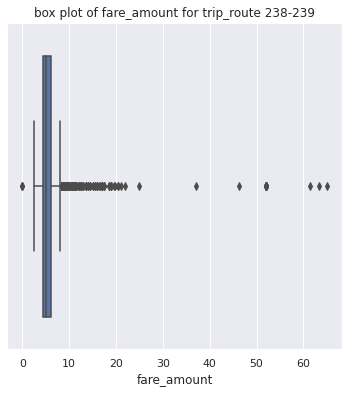

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median fare_amount for the respective route
    print("the fare amount for the route " + trip_route +' '+ 'is ' + str(trip_route_df['fare_amount'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['fare_amount'],ax=ax)
    # set_title
    ax.set_title('box plot of fare_amount for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From above plot it is clear that the busiset route does not
assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is bit lower than the other Busiset trip_routes. 

It is also clearly vissible that the route 161-237 has higher median fare amount compared to other routes and its outliers are also low.

the trip_route 264-264 has the highest fare_amount of 9.5 median.Its worthnoting that these route should be kept in mind for business prospect.

the fare amount for the route 237-236 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


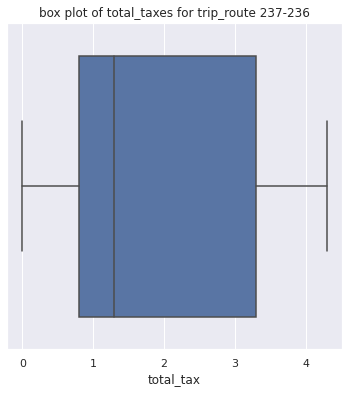

the fare amount for the route 236-236 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


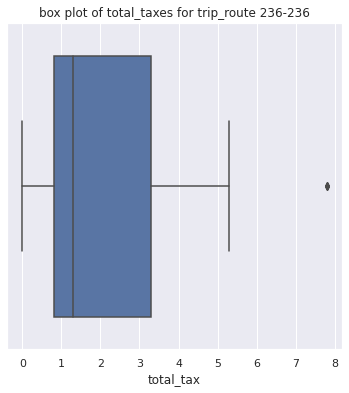

the fare amount for the route 236-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


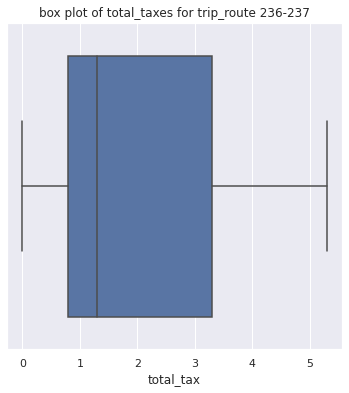

the fare amount for the route 237-237 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


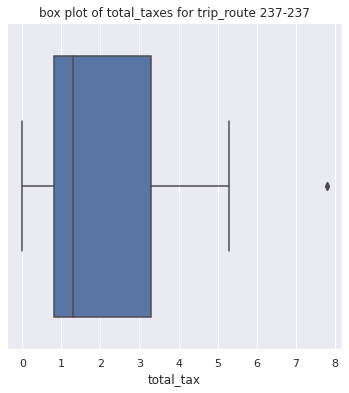

the fare amount for the route 264-264 is 0.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


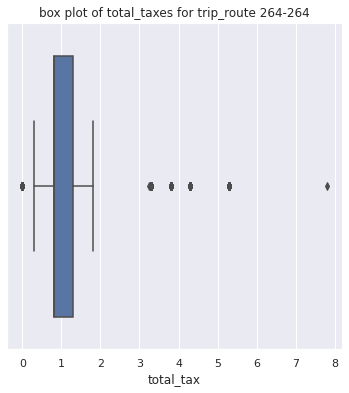

the fare amount for the route 239-238 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


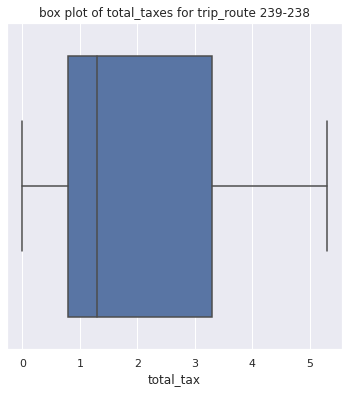

the fare amount for the route 239-142 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


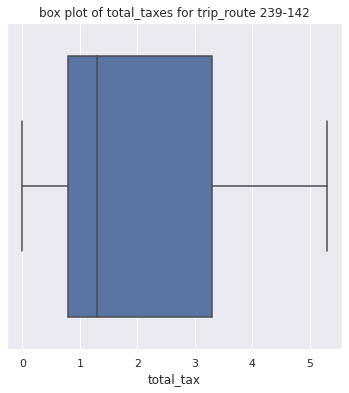

the fare amount for the route 161-237 is 1.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


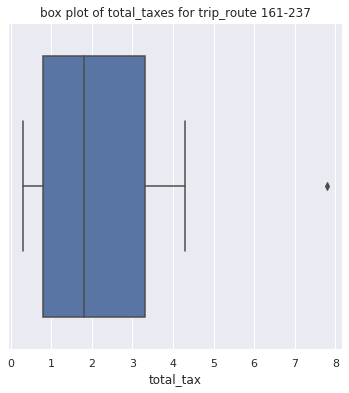

the fare amount for the route 142-239 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


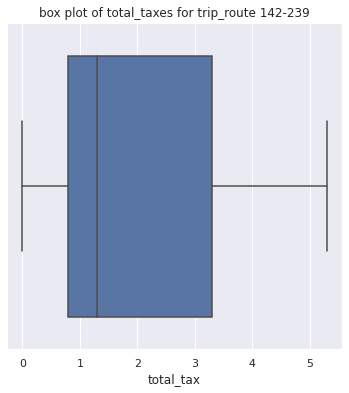

the fare amount for the route 238-239 is 1.3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


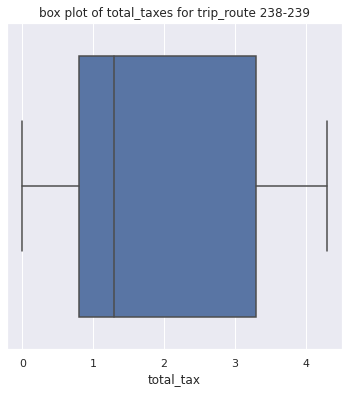

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the total_taxes for the route " + trip_route +' '+ 'is ' + str(trip_route_df['total_tax'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe pickup_locID_dataframe
    sns.boxplot(trip_route_df['total_tax'],ax=ax)
    # set_title
    ax.set_title('box plot of total_taxes for trip_route '+ str(trip_route ))
    sns.set()
    plt.show()

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 dollars, but the trip_route 264-264 total_tax i.e .8 dollars as well. 

As we seen from fare_amount plot of routes, the 161-237 route has higher fare amount as compared to other routes but it could be higher because of higher taxes applied on the these route as shown in above plot. as it has highest total_tax value of 1.8 dollars
 



In [ ]:
# import important libraries - matplotlib, seaborn and pandas
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# yellow taxi data
file_loc1 = '/content/drive/MyDrive/Onelearn/EDA and Visulisation/W8D3/Lessons/yellow_taxi_data_2020-02_cleaned.csv'

# read file
trip_data = pd.read_csv(file_loc1)
trip_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,duration,trip_pickup_hour,trip_dropoff_hour,trip_day,total_tax,routes
0,2020-02-01 00:17:35,2020-02-01 00:30:32,1,2.60,145,7,Credit_card,11.0,2.45,0.0,14.75,0.0,12.950000,0,0,Saturday,1.3,145-7
1,2020-02-01 00:32:47,2020-02-01 01:05:36,1,4.80,45,61,Credit_card,21.5,6.30,0.0,31.60,2.5,32.816667,0,1,Saturday,3.8,45-61
2,2020-02-01 00:31:44,2020-02-01 00:43:28,1,3.20,186,140,Credit_card,11.0,1.00,0.0,15.80,2.5,11.733333,0,0,Saturday,3.8,186-140
3,2020-02-01 00:07:35,2020-02-01 00:31:39,1,4.38,144,140,Credit_card,18.0,3.00,0.0,24.80,2.5,24.066667,0,0,Saturday,1.3,144-140
4,2020-02-01 00:51:43,2020-02-01 01:01:29,1,2.28,238,152,Cash,9.5,0.00,0.0,10.80,0.0,9.766667,0,1,Saturday,1.3,238-152


In [ ]:
trip_route_value_counts = trip_data['routes'].value_counts()

In [ ]:
trip_route_top_10 = trip_route_value_counts.nlargest(10).index

the duration for the route 237-236 is 6.25


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


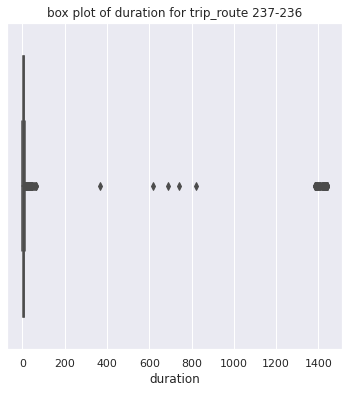

the duration for the route 236-236 is 3.8


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


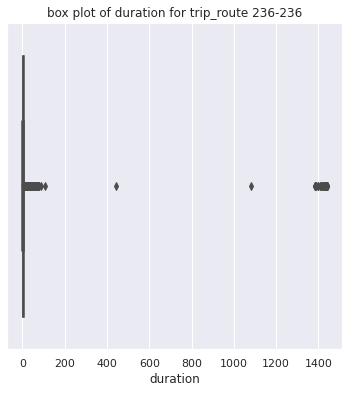

the duration for the route 236-237 is 7.116666666666666


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


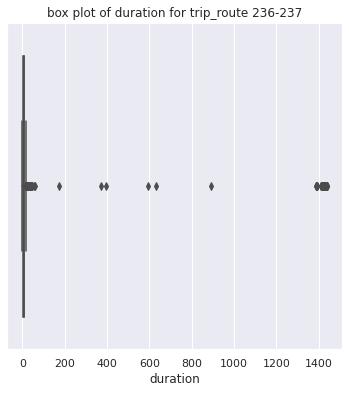

the duration for the route 237-237 is 4.4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


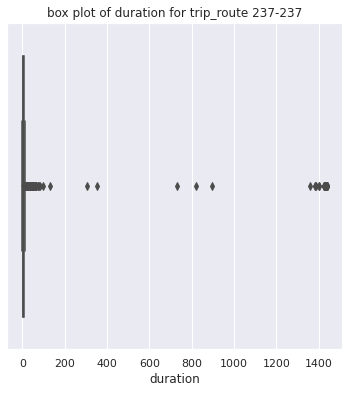

the duration for the route 264-264 is 8.216666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


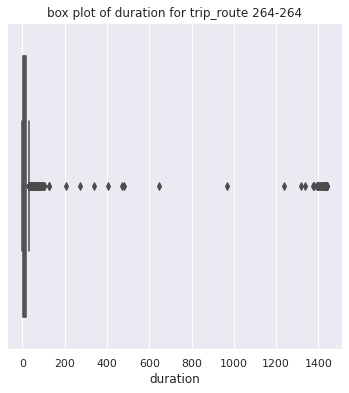

the duration for the route 239-238 is 4.466666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


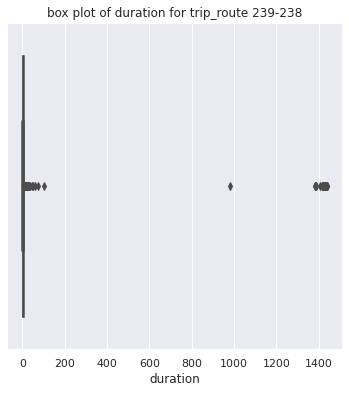

the duration for the route 239-142 is 5.216666666666667


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


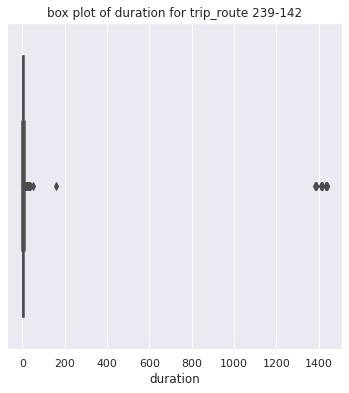

the duration for the route 161-237 is 8.683333333333334


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


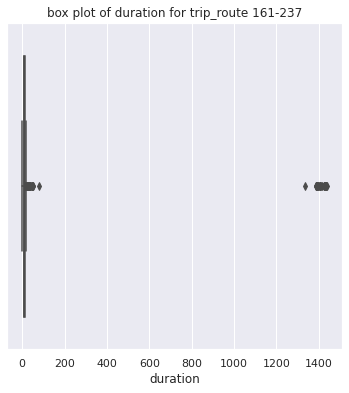

the duration for the route 142-239 is 5.45


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


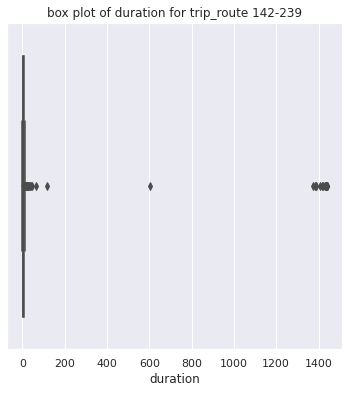

the duration for the route 238-239 is 4.5


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


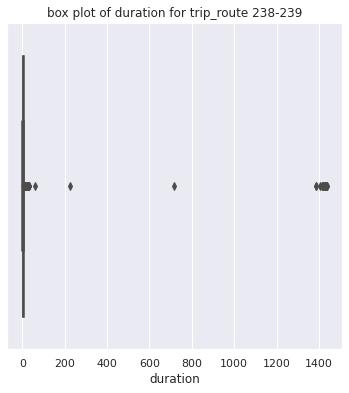

In [ ]:
for trip_route in trip_route_top_10:
    # creating new data frame with trip_route.
    trip_route_df = trip_data.loc[trip_data['routes'] == trip_route]
    #print median total_taxes for the respective route
    print("the duration for the route " + trip_route +' '+ 'is ' + str(trip_route_df['duration'].median()))
    #plotting boxplot 
    fig,ax = plt.subplots(figsize=(6,6))
    # sns.boxplot of duration from the dataframe  trip_route_df 
    sns.boxplot(trip_route_df['duration'],ax=ax)
    # set_title
    ax.set_title('box plot of duration for trip_route '+ trip_route)
    sns.set()
    plt.show()

As seen from the above plot that the busisest location 237-236 has lower duration as compared other busisest location.

On the other hand 264-264 has higher duration and that could be the reason for the higher fare_amount.

#FINAL RESULTS FROM EDA

fare_amount - most of the fare amount is within 9 dollar value as is shown by the median value. Though there are some significant outliers, the maximum of which is beyond 6000 dollars.

tip_amount - most of the tip amount is within 2 dollar as is shown by the median value. Though again here too we have outliers, the maximum of which is around 560 dollars.

tolls_amount - most of the tolls_amount value is 0 so it seems most of the trips do not have to pay for tolls.

total_taxes - most of the total_taxes values is within 1.3 dollars as is shown by the median value. Though we have outliers in this case but it is not as signiificant as the case for tip and fare.

total_amount - most of the total_amount values is within 14.5 dollars as is shown by the median value. Again the outliers in this case seems mostly because of outliers in fare_amount.

duration - most of the values in duration is within 12 minutes range as is shown by the median value. We do have some outliers which are beyond the range of 3000 minutes.

trip_distance - most of the trip_distance is within 1.60 miles value as is shown by the median. The outlier in this case is about 350 miles.

Credit card is the most preferred mode of payment followed by cash.

Trip Hour-1)The dropoff and pick up hour distribution looks almost same, it is because the trip duration in most of the cases is less than an hour with the median duration value within 11 min.

2) Peak hour for the pick up and drop off is around evening from 5 to 7. The busiest time is 6PM.

3) There is less traffic during night times and only after 8AM in morning does the pickup and drop off starts picking up pace.

Trip day

Sunday has the lowest taxi uses while saturday is the busiest.Weekdays except Monday have heavy taxi uses.

The busiest location in terms of pickup are 161, 237 and 236

The busiest location for dropoff too are 236 , 237 and 161 but order is some what different. We can also look for routes which are busiest.

Here we see that the mostly 1 or 2 passengers avail the cab.

From the hour 8PM to 5AM the median taxes seem to be a bit higher than other hours, it may be due to some overnight surcharges.

Evening from 4PM to 7PM have quite variable taxes and is a bit higher than other times, it may be due to higher traffic charges.

We discovered from the dataset that even for the busiest pickup location the median fare_amount is a lower than other busier pickup locations. So just choosing busy pickup locations for higher revenue won't work, we may have to choose locations taking into consideration both busy traffic and higher median fare_amount.

Early morning hours of 5AM to 6AM have shorter duration trips

Routes:

From above plot it is clear that the busiset route does not assure you about the highest revenue. as seen from the graph fare amount for the buisest trip_rout 237-236 is bit lower than the other Busiset trip_routes.

It is also clearly vissible that the route 161-237 has higher median fare amount compared to other routes and its outliers are also low.

the trip_route 264-264 has the highest fare_amount of 9.5 median.Its worthnoting that these route should be kept in mind for business prospect.

From the above plot it is clearly vissible almost all routes has same total_tax of 1.3 dollars, but the trip_route 264-264 total_tax i.e .8 dollars as well.

As we seen from fare_amount plot of routes, the 161-237 route has higher fare amount as compared to other routes but it could be higher because of higher taxes applied on the these route as shown in above plot. as it has highest total_tax value of 1.8 dollars

As seen from the above plot that the busisest location 237-236 has lower duration as compared other busisest location.

On the other hand 264-264 has higher duration and that could be the reason for the higher fare_amount.



* It is observed that ,it is not at all necessary that the busiest route has higher other features as well. and for the business prospect we have to see the other routes as well for higher revenue genrations. One such route is 264-264.
